# Assigment 2

# Task 1

In [231]:
# Import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
# Load the data
url = "https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_6425/80424905.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


### 1. Data Cleaning & Transformation

#### 1.1 Viewing the data structure and data types.

In [233]:
print("The first 5 rows of the dataset")
print("-------------------------------")
display(df.head(10))

print("Detailed information about the dataset:")
print("---------------------------------------")
display(df.info())

The first 5 rows of the dataset
-------------------------------


Report Number Local Case Number                Agency Name  \
0   MCP3040003N         190026050   Montgomery County Police   
1    EJ78850038         230034791  Gaithersburg Police Depar   
2   MCP2009002G         230034583   Montgomery County Police   
3   MCP3201004C         230035036   Montgomery County Police   
4   MCP23290028         230035152   Montgomery County Police   
5   MCP295200DV         230032956   Montgomery County Police   
6   MCP33510013         230033282   Montgomery County Police   
7    EJ7869003F         230032124  Gaithersburg Police Depar   
8   MCP3244002K         230034697   Montgomery County Police   
9   MCP2863002V         230034445   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  05/31/2019 03:00:00 PM               NaN   
1  Property Damage Crash  07/21/2023 05:59:00 PM  Maryland (State)   
2  Property Damage Crash  07/20/2023 03:10:00 PM  Maryland (State)   
3  Property Damage Crash  07/23/2023 12:10:00 PM            County   
4  Property Damage Crash  07/24/2023 06:10:00 AM            County   
5  Property Damage Crash  07/11/2023 07:40:00 AM            County   
6  Property Damage Crash  07/12/2023 08:28:00 PM  Maryland (State)   
7           Injury Crash  07/05/2023 11:25:00 PM  Maryland (State)   
8  Property Damage Crash  07/21/2023 07:14:00 AM        US (State)   
9  Property Damage Crash  07/19/2023 07:00:00 PM  Maryland (State)   

                Road Name Cross-Street Type                Cross-Street Name  \
0                     NaN               NaN                              NaN   
1            FREDERICK RD           Unknown                  WATKINS MILL RD   
2             GEORGIA AVE  Maryland (State)                       NORBECK RD   
3         CRYSTAL ROCK DR            County                WATERS LANDING DR   
4  MONTGOMERY VILLAGE AVE            County                     CENTERWAY RD   
5               WAYNE AVE            County                            ALLEY   
6           COLESVILLE RD        US (State)                    COLESVILLE RD   
7              CLOPPER RD           Unknown  STRUC #15093 GREAT SENECA CREEK   
8             GEORGIA AVE           Unknown        NW EASTERN AVE (DC MAINT)   
9            WOODFIELD RD            County                    MIDCOUNTY HWY   

             Off-Road Description  ... Speed Limit Driverless Vehicle  \
0  PARKING LOT OF 3215 SPARTAN RD  ...          15                 No   
1                             NaN  ...          40                 No   
2                             NaN  ...          35                 No   
3                             NaN  ...          40                 No   
4                             NaN  ...          35                 No   
5                             NaN  ...          30                 No   
6                             NaN  ...          25                 No   
7                             NaN  ...          35                 No   
8                             NaN  ...          35                 No   
9                             NaN  ...          30                 No   

  Parked Vehicle Vehicle Year Vehicle Make Vehicle Model Equipment Problems  \
0             No         2004        HONDA            TK            UNKNOWN   
1             No         2011          GMC            TK          NO MISUSE   
2             No         2019         FORD          F150          NO MISUSE   
3             No         2016          KIA            SW          NO MISUSE   
4             No         2016         TOYT            TK          NO MISUSE   
5             No         2016         GILL           BUS          NO MISUSE   
6             No         2014         SUBA            SW          NO MISUSE   
7             No         2013          BMW          328I            UNKNOWN   
8             No         2020      HYUNDAI       ELENTRA            UNKNOWN   
9             No         2022         VOLK         

Detailed information about the dataset:
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   172105 non-null  object 
 1   Local Case Number               172105 non-null  object 
 2   Agency Name                     172105 non-null  object 
 3   ACRS Report Type                172105 non-null  object 
 4   Crash Date/Time                 172105 non-null  object 
 5   Route Type                      155132 non-null  object 
 6   Road Name                       156168 non-null  object 
 7   Cross-Street Type               155099 non-null  object 
 8   Cross-Street Name               156154 non-null  object 
 9   Off-Road Description            15935 non-null   object 
 10  Municipality                    19126 non-null   object 
 11

None

This dataset contains information about all traffic collisions that occurred on county and local roadways within Montgomery County. The data was collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police. It includes recorded details about each collision and the drivers involved.

Based on the previous information, the dataset comprises a total of 172,105 records and 43 columns. These columns consist of 2 float64 data types, 2 integer data types, and 39 object data types.

#### 1.2 Handling missing values

In [234]:
# 1.2.1 Visualize the missing values
missing_values = df.isnull().sum()
display(missing_values)
print(f"There are total {missing_values.sum()} missing values in the dataset.")

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16973
Road Name                          15937
Cross-Street Type                  17006
Cross-Street Name                  15951
Off-Road Description              156170
Municipality                      152979
Related Non-Motorist              166642
Collision Type                       585
Weather                            13354
Surface Condition                  20118
Light                               1445
Traffic Control                    25469
Driver Substance Abuse             31324
Non-Motorist Substance Abuse      167788
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      140746
Driver Distracted By                   0
Drivers License 

There are total 995809 missing values in the dataset.


<Axes: >

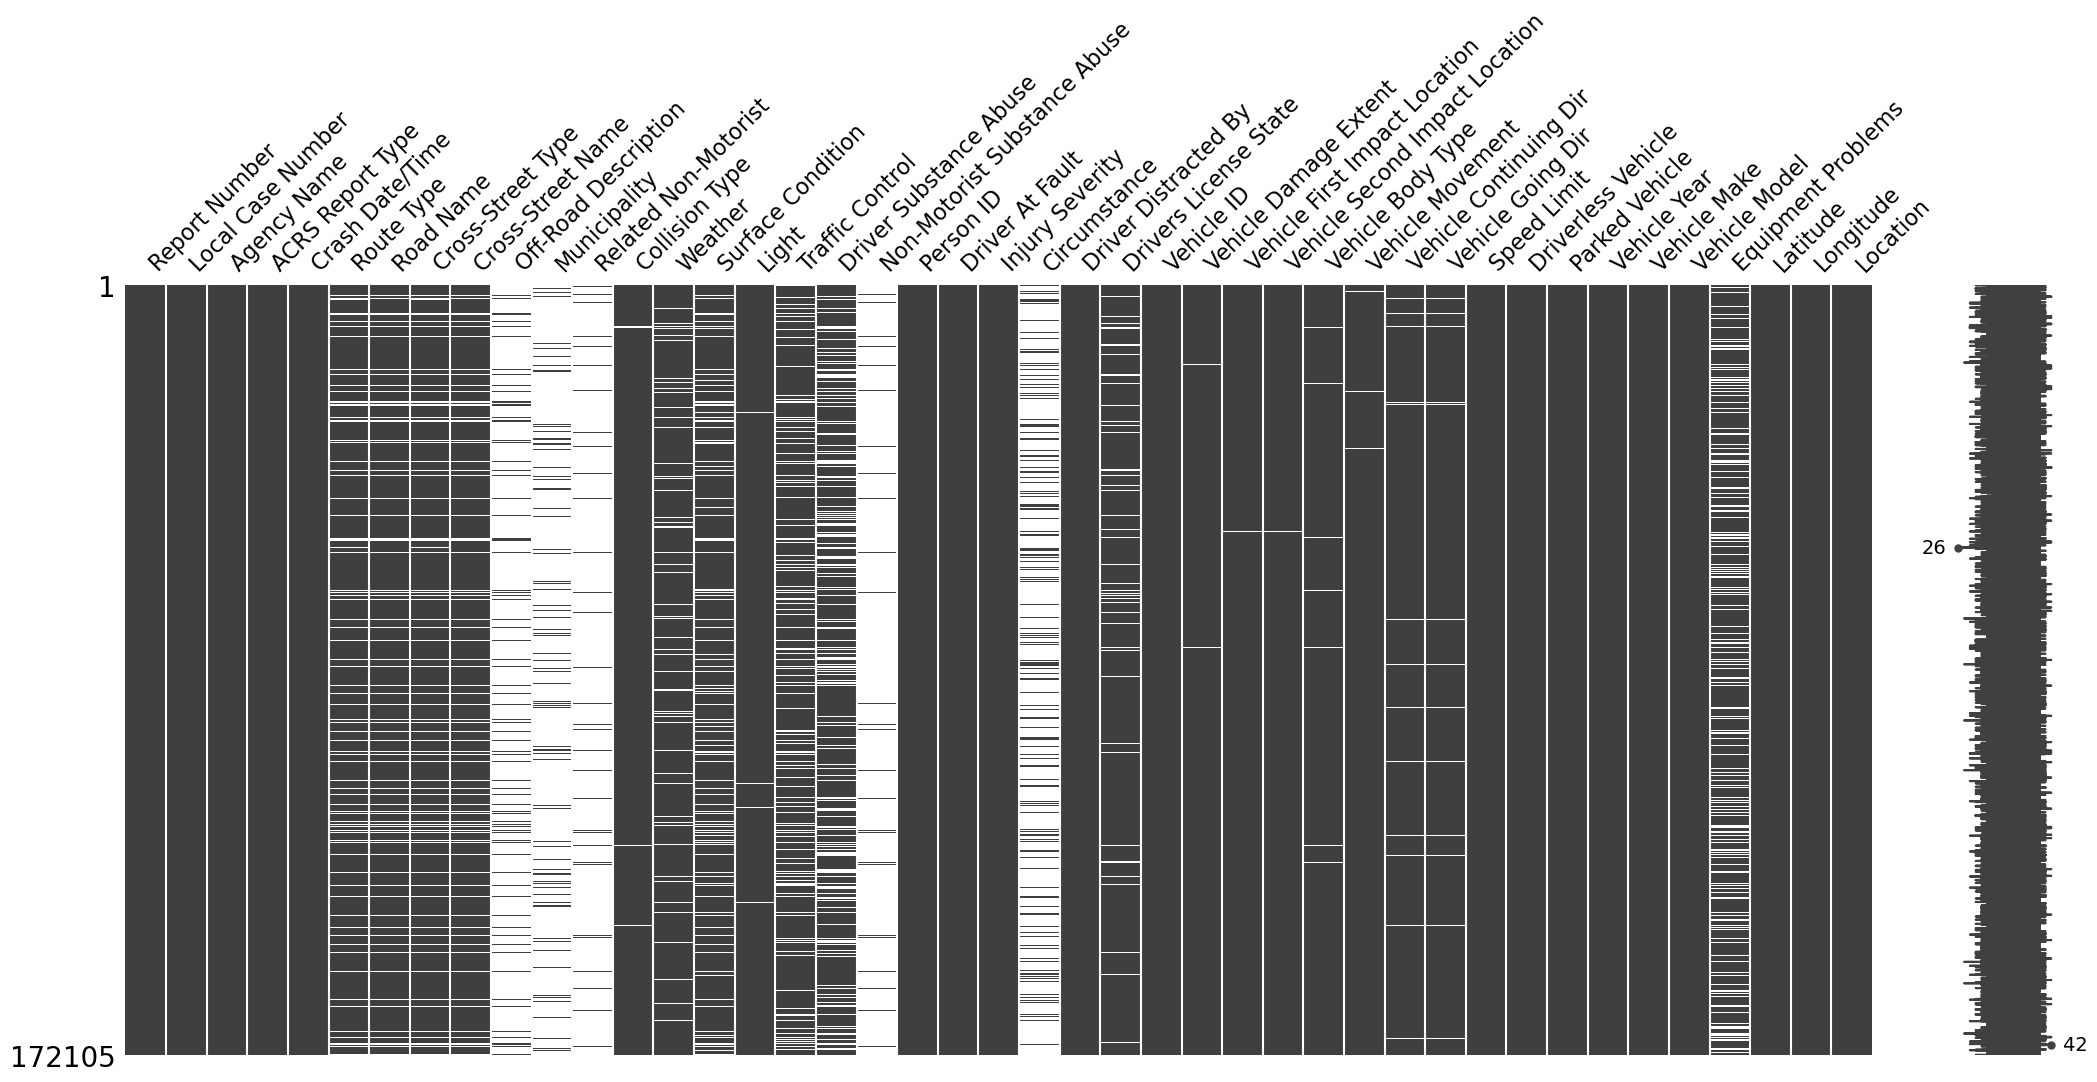

In [235]:
# Visualizing the locations of the missing data
# Import the library
import missingno as mno

# Check the missing values
mno.matrix(df)

From the location and summary of the missing values report, it appears that no rows have an excessive number of missing values. Missing values are primarily found in columns with object data types rather than numeric columns. To address these missing values, I will employ three strategies:

*(1)Remove columns with more than 80% of missing values (137,684 out of 172,105 entries). These columns include "Off-Road Description," "Municipality," "Related Non-Motorist," "Non-Motorist Substance Abuse," and "Circumstance", total 5 columns.

*(2)Impute missing values in the "Vehicle Make" and "Vehicle Model" columns with the most frequent value. Since these columns have only a few missing values, imputing them with the most frequent value will not significantly affect the overall data distribution.

*(3)Impute missing values in other columns (total  19 columns) with the value "Missing_record" to indicate the absence of records. These columns contain information about crashes and drivers, and using "Missing_record" as a separate category will accurately represent the absence of data in these fields.

In [236]:
# 1.2.2 Handling the missing values

# (1)Remove columns with more than 80% of missing values

threshold = 0.8 * len(df)
df1 = df.dropna(axis=1, thresh=threshold)
#display(df1.info())

In [237]:
# (2)Impute missing values with the most frequent value.
# Import the necessay dependency

from sklearn.impute import SimpleImputer

most_frequent= SimpleImputer(strategy = "most_frequent")
df1[['Vehicle Make', 'Vehicle Model']] = most_frequent.fit_transform(df1[['Vehicle Make', 'Vehicle Model']])
display(df1.info())

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_6425/664551593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Vehicle Make', 'Vehicle Model']] = most_frequent.fit_transform(df1[['Vehicle Make', 'Vehicle Model']])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   172105 non-null  object 
 1   Local Case Number               172105 non-null  object 
 2   Agency Name                     172105 non-null  object 
 3   ACRS Report Type                172105 non-null  object 
 4   Crash Date/Time                 172105 non-null  object 
 5   Route Type                      155132 non-null  object 
 6   Road Name                       156168 non-null  object 
 7   Cross-Street Type               155099 non-null  object 
 8   Cross-Street Name               156154 non-null  object 
 9   Collision Type                  171520 non-null  object 
 10  Weather                         158751 non-null  object 
 11  Surface Condition               151987 non-null  object 
 12  Light           

None

In [238]:
# (3)Impute missing values with the value "Missing_record" to indicate the absence of records.

df1.fillna('Missing_record', inplace=True)

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_6425/3880751151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna('Missing_record', inplace=True)


In [239]:
# Check the dataset again about the missing values

df1.isnull().sum()

Report Number                     0
Local Case Number                 0
Agency Name                       0
ACRS Report Type                  0
Crash Date/Time                   0
Route Type                        0
Road Name                         0
Cross-Street Type                 0
Cross-Street Name                 0
Collision Type                    0
Weather                           0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Person ID                         0
Driver At Fault                   0
Injury Severity                   0
Driver Distracted By              0
Drivers License State             0
Vehicle ID                        0
Vehicle Damage Extent             0
Vehicle First Impact Location     0
Vehicle Second Impact Location    0
Vehicle Body Type                 0
Vehicle Movement                  0
Vehicle Continuing Dir            0
Vehicle Going Dir           

#### 1.3 Address duplicate records

In [240]:
# I define that all values in all columns are the same as the duplicated records
all_duplicates = df1.duplicated(keep=False)

# Display rows that are duplicates
all_duplicates_df = df1[all_duplicates]
print("Duplicate rows where all values in all columns are the same")
display(all_duplicates_df)

Duplicate rows where all values in all columns are the same


Empty DataFrame
Columns: [Report Number, Local Case Number, Agency Name, ACRS Report Type, Crash Date/Time, Route Type, Road Name, Cross-Street Type, Cross-Street Name, Collision Type, Weather, Surface Condition, Light, Traffic Control, Driver Substance Abuse, Person ID, Driver At Fault, Injury Severity, Driver Distracted By, Drivers License State, Vehicle ID, Vehicle Damage Extent, Vehicle First Impact Location, Vehicle Second Impact Location, Vehicle Body Type, Vehicle Movement, Vehicle Continuing Dir, Vehicle Going Dir, Speed Limit, Driverless Vehicle, Parked Vehicle, Vehicle Year, Vehicle Make, Vehicle Model, Equipment Problems, Latitude, Longitude, Location]
Index: []

[0 rows x 38 columns]

There are no duplicate rows in this dataset, I can proceed with the data processing.

#### 1.4 Correct any inaccuracies or inconsistencies in the data

1.4.1 For the object-type columns

In [241]:
#First check the unique values in the object-type columns to determine the appropriate actions

# Get the list of object-type columns
object_col = df1.select_dtypes(include=['object']).columns
#display(len(object_col))

# Display unique values for each object-type column
for column in object_col:
    print(f"Unique values in column '{column}':")
    display(df1[column].unique())
    display()

Unique values in column 'Report Number':


array(['MCP3040003N', 'EJ78850038', 'MCP2009002G', ..., 'MCP32710015',
       'DD5649002Q', 'MCP3090006L'], dtype=object)

Unique values in column 'Local Case Number':


array(['190026050', '230034791', '230034583', ..., '210032321',
       '220049792', '220055471'], dtype=object)

Unique values in column 'Agency Name':


array(['Montgomery County Police', 'Gaithersburg Police Depar',
       'Takoma Park Police Depart', 'Rockville Police Departme',
       'Maryland-National Capital', 'MONTGOMERY', 'ROCKVILLE', 'TAKOMA',
       'GAITHERSBURG', 'MCPARK'], dtype=object)

Unique values in column 'ACRS Report Type':


array(['Property Damage Crash', 'Injury Crash', 'Fatal Crash'],
      dtype=object)

Unique values in column 'Crash Date/Time':


array(['05/31/2019 03:00:00 PM', '07/21/2023 05:59:00 PM',
       '07/20/2023 03:10:00 PM', ..., '07/01/2021 05:22:00 PM',
       '11/11/2022 02:40:00 AM', '12/15/2022 09:00:00 AM'], dtype=object)

Unique values in column 'Route Type':


array(['Missing_record', 'Maryland (State)', 'County', 'US (State)',
       'Municipality', 'Interstate (State)', 'Other Public Roadway',
       'Ramp', 'Government', 'Service Road', 'Unknown'], dtype=object)

Unique values in column 'Road Name':


array(['Missing_record', 'FREDERICK RD', 'GEORGIA AVE', ...,
       'ALLSPICE RD', 'FALLBROOK CT', 'HARVEST SCENE CT'], dtype=object)

Unique values in column 'Cross-Street Type':


array(['Missing_record', 'Unknown', 'Maryland (State)', 'County',
       'US (State)', 'Other Public Roadway', 'Municipality', 'Ramp',
       'Government', 'Interstate (State)', 'Service Road'], dtype=object)

Unique values in column 'Cross-Street Name':


array(['Missing_record', 'WATKINS MILL RD', 'NORBECK RD', ...,
       'KEMSCOT DR', 'FILLMORE DR', 'SPRINGFIELD RD'], dtype=object)

Unique values in column 'Collision Type':


array(['OTHER', 'STRAIGHT MOVEMENT ANGLE', 'HEAD ON LEFT TURN',
       'SAME DIR REAR END', 'SINGLE VEHICLE', 'HEAD ON',
       'ANGLE MEETS LEFT HEAD ON', 'OPPOSITE DIRECTION SIDESWIPE',
       'SAME DIRECTION RIGHT TURN', 'ANGLE MEETS LEFT TURN',
       'SAME DIRECTION SIDESWIPE', 'SAME DIR BOTH LEFT TURN',
       'ANGLE MEETS RIGHT TURN', 'SAME DIR REND RIGHT TURN',
       'SAME DIRECTION LEFT TURN', 'SAME DIR REND LEFT TURN', 'UNKNOWN',
       'OPPOSITE DIR BOTH LEFT TURN', 'Missing_record'], dtype=object)

Unique values in column 'Weather':


array(['CLEAR', 'CLOUDY', 'RAINING', 'Missing_record', 'UNKNOWN', 'FOGGY',
       'OTHER', 'SNOW', 'SLEET', 'WINTRY MIX', 'BLOWING SNOW',
       'SEVERE WINDS', 'BLOWING SAND, SOIL, DIRT'], dtype=object)

Unique values in column 'Surface Condition':


array(['Missing_record', 'DRY', 'WET', 'UNKNOWN',
       'WATER(STANDING/MOVING)', 'MUD, DIRT, GRAVEL', 'ICE', 'SNOW',
       'SLUSH', 'OTHER', 'OIL', 'SAND'], dtype=object)

Unique values in column 'Light':


array(['DAYLIGHT', 'DUSK', 'DARK -- UNKNOWN LIGHTING', 'DARK LIGHTS ON',
       'Missing_record', 'DAWN', 'OTHER', 'DARK NO LIGHTS', 'UNKNOWN'],
      dtype=object)

Unique values in column 'Traffic Control':


array(['Missing_record', 'TRAFFIC SIGNAL', 'NO CONTROLS', 'OTHER',
       'STOP SIGN', 'FLASHING TRAFFIC SIGNAL', 'WARNING SIGN', 'UNKNOWN',
       'YIELD SIGN', 'PERSON', 'SCHOOL ZONE SIGN DEVICE',
       'RAILWAY CROSSING DEVICE'], dtype=object)

Unique values in column 'Driver Substance Abuse':


array(['UNKNOWN', 'NONE DETECTED', 'ALCOHOL PRESENT', 'Missing_record',
       'COMBINED SUBSTANCE PRESENT', 'ILLEGAL DRUG PRESENT',
       'ALCOHOL CONTRIBUTED', 'ILLEGAL DRUG CONTRIBUTED',
       'MEDICATION CONTRIBUTED', 'MEDICATION PRESENT',
       'COMBINATION CONTRIBUTED', 'OTHER'], dtype=object)

Unique values in column 'Person ID':


array(['DE2A24CD-7919-4F8D-BABF-5B75CE12D21E',
       'E7058A8E-4F18-4D2A-954E-04A099CFED12',
       '2B404D6D-8DB5-4CB6-9E71-9F1B8D0A8925', ...,
       '470ABCF2-C6D3-4C23-B503-57BAEC974BDD',
       'F8402B27-9E38-4602-B4FA-1CF604036EDD',
       '5A4ECFEB-9D5D-4ED6-B95C-3222E0E76821'], dtype=object)

Unique values in column 'Driver At Fault':


array(['Yes', 'No', 'Unknown'], dtype=object)

Unique values in column 'Injury Severity':


array(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY',
       'SUSPECTED SERIOUS INJURY', 'POSSIBLE INJURY', 'FATAL INJURY'],
      dtype=object)

Unique values in column 'Driver Distracted By':


array(['UNKNOWN', 'NOT DISTRACTED', 'LOOKED BUT DID NOT SEE',
       'INATTENTIVE OR LOST IN THOUGHT', 'OTHER DISTRACTION',
       'USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE',
       'NO DRIVER PRESENT', 'TEXTING FROM A CELLULAR PHONE',
       'EATING OR DRINKING',
       'DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT',
       'OTHER CELLULAR PHONE RELATED', 'BY MOVING OBJECT IN VEHICLE',
       'TALKING OR LISTENING TO CELLULAR PHONE', 'BY OTHER OCCUPANTS',
       'ADJUSTING AUDIO AND OR CLIMATE CONTROLS',
       'OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)',
       'DIALING CELLULAR PHONE',
       'USING DEVICE OBJECT BROUGHT INTO VEHICLE', 'SMOKING RELATED'],
      dtype=object)

Unique values in column 'Drivers License State':


array(['Missing_record', 'MD', 'CA', 'DC', 'VA', 'MA', 'NY', 'XX', 'WV',
       'GA', 'TX', 'NJ', 'PA', 'TN', 'WA', 'OH', 'ND', 'MO', 'FL', 'MS',
       'NC', 'NM', 'UT', 'IN', 'AZ', 'AR', 'AL', 'OK', 'MI', 'CT', 'NH',
       'IL', 'DE', 'SC', 'OR', 'NE', 'VT', 'WI', 'MN', 'US', 'CO', 'LA',
       'HI', 'NF', 'NV', 'KY', 'ME', 'AB', 'MH', 'QC', 'MB', 'ON', 'ID',
       'BC', 'NL', 'PR', 'IA', 'KS', 'IT', 'MT', 'FM', 'NB', 'AK', 'RI',
       'YT', 'VI', 'WY', 'UM', 'AS', 'SD', 'NS', 'MP', 'SK', 'GU', 'NT'],
      dtype=object)

Unique values in column 'Vehicle ID':


array(['165AD539-A8C8-4004-AF73-B7DCAAA8B3CC',
       '1C3C3E2F-9A23-4ED0-9BB3-B6C370D99C37',
       '0483CE47-E0FC-4BCA-BAB0-B7541820FEE6', ...,
       'CD875BDC-5B10-47F6-B3E7-7C091A71FB5D',
       '15D3D66B-8337-4E7A-BAE6-855C02AE1CA7',
       '331A1FE9-959E-4C86-9A12-F5ED3C3BF3B1'], dtype=object)

Unique values in column 'Vehicle Damage Extent':


array(['SUPERFICIAL', 'DISABLING', 'FUNCTIONAL', 'DESTROYED',
       'Missing_record', 'UNKNOWN', 'NO DAMAGE', 'OTHER'], dtype=object)

Unique values in column 'Vehicle First Impact Location':


array(['ONE OCLOCK', 'THREE OCLOCK', 'TWELVE OCLOCK', 'SIX OCLOCK',
       'FOUR OCLOCK', 'UNKNOWN', 'NINE OCLOCK', 'TEN OCLOCK',
       'SEVEN OCLOCK', 'ELEVEN OCLOCK', 'EIGHT OCLOCK', 'TWO OCLOCK',
       'FIVE OCLOCK', 'NON-COLLISION', 'ROOF TOP', 'UNDERSIDE',
       'Missing_record'], dtype=object)

Unique values in column 'Vehicle Second Impact Location':


array(['ONE OCLOCK', 'TWO OCLOCK', 'TWELVE OCLOCK', 'SIX OCLOCK',
       'FOUR OCLOCK', 'FIVE OCLOCK', 'UNKNOWN', 'NINE OCLOCK',
       'TEN OCLOCK', 'SEVEN OCLOCK', 'ELEVEN OCLOCK', 'EIGHT OCLOCK',
       'THREE OCLOCK', 'NON-COLLISION', 'ROOF TOP', 'UNDERSIDE',
       'Missing_record'], dtype=object)

Unique values in column 'Vehicle Body Type':


array(['PASSENGER CAR', 'PICKUP TRUCK', '(SPORT) UTILITY VEHICLE',
       'TRANSIT BUS', 'VAN', 'MOTORCYCLE', 'UNKNOWN', 'TRUCK TRACTOR',
       'POLICE VEHICLE/EMERGENCY', 'Missing_record',
       'POLICE VEHICLE/NON EMERGENCY',
       'MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))',
       'OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)',
       'CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))',
       'AMBULANCE/EMERGENCY', 'OTHER BUS', 'SCHOOL BUS',
       'FIRE VEHICLE/NON EMERGENCY', 'MOPED', 'RECREATIONAL VEHICLE',
       'OTHER', 'STATION WAGON', 'AMBULANCE/NON EMERGENCY', 'AUTOCYCLE',
       'SNOWMOBILE', 'FIRE VEHICLE/EMERGENCY',
       'ALL TERRAIN VEHICLE (ATV)', 'FARM VEHICLE', 'CROSS COUNTRY BUS',
       'LOW SPEED VEHICLE', 'LIMOUSINE'], dtype=object)

Unique values in column 'Vehicle Movement':


array(['PARKING', 'MAKING LEFT TURN', 'ACCELERATING',
       'STARTING FROM LANE', 'STOPPED IN TRAFFIC LANE',
       'SLOWING OR STOPPING', 'MOVING CONSTANT SPEED', 'BACKING',
       'MAKING RIGHT TURN', 'UNKNOWN', 'CHANGING LANES', 'PARKED',
       'MAKING U TURN', 'Missing_record', 'PASSING',
       'STARTING FROM PARKED', 'DRIVERLESS MOVING VEH.',
       'LEAVING TRAFFIC LANE', 'ENTERING TRAFFIC LANE', 'OTHER',
       'NEGOTIATING A CURVE', 'RIGHT TURN ON RED', 'SKIDDING'],
      dtype=object)

Unique values in column 'Vehicle Continuing Dir':


array(['North', 'East', 'West', 'South', 'Missing_record', 'Unknown'],
      dtype=object)

Unique values in column 'Vehicle Going Dir':


array(['North', 'South', 'East', 'West', 'Missing_record', 'Unknown'],
      dtype=object)

Unique values in column 'Driverless Vehicle':


array(['No', 'Unknown'], dtype=object)

Unique values in column 'Parked Vehicle':


array(['No', 'Yes'], dtype=object)

Unique values in column 'Vehicle Make':


array(['HONDA', 'GMC', 'FORD', ..., 'INTR', 'NI', 'HYUNUDAI'],
      dtype=object)

Unique values in column 'Vehicle Model':


array(['TK', 'F150', 'SW', ..., 'SPORTSER', 'DURANGOQ', 'RENAGADE'],
      dtype=object)

Unique values in column 'Equipment Problems':


array(['UNKNOWN', 'NO MISUSE', 'Missing_record', 'OTHER',
       'AIR BAG FAILED', 'STRAP/TETHER LOOSE', 'BELT(S) MISUSED',
       'NOT STREPPED RIGHT', 'BELTS/ANCHORS BROKE', 'FACING WRONG WAY',
       'SIZE/TYPE IMPROPER'], dtype=object)

Unique values in column 'Location':


array(['(39.15004368, -77.06308884)', '(39.1592635, -77.21902483)',
       '(39.10953506, -77.07580619)', ..., '(38.96241123, -77.08795165)',
       '(39.07450374, -77.11128026)', '(39.1063, -77.20217533)'],
      dtype=object)

For the object columns, I have checked the unique values in each column, In the object columns, "Vehicle Make," some typos are found. For instance, "TOYT" should be "TOYOTA" and "HOND" should be "HONDA." I'll replace these typos in the "Vehicle Make" column.

In [242]:
# Replace the "TOYT" with "TOYOTA" in column " Vehicel Make"
df1['Vehicle Make'] = df1['Vehicle Make'].replace('TOYT', 'TOYOTA')

# Replace the "HOND" with "HONDA" in column " Vehicel Make".
df1['Vehicle Make'] = df1['Vehicle Make'].replace('HOND', 'HONDA')

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_6425/1494172810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Vehicle Make'] = df1['Vehicle Make'].replace('TOYT', 'TOYOTA')
/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_6425/1494172810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Vehicle Make'] = df1['Vehicle Make'].replace('HOND', 'HONDA')


1.4.2 For the float and int data types

In [243]:
# Use the summary report, pair plot and box plot to check the outliers or inconsistence values in the data
# (1) Check the mathematical statistics of the numerical data types
df1.describe()

Speed Limit   Vehicle Year       Latitude      Longitude
count  172105.000000  172105.000000  172105.000000  172105.000000
mean       32.549752    1966.306946      39.083119     -77.112343
std        11.059987     340.615468       0.072032       0.098571
min         0.000000       0.000000      37.720000     -79.486000
25%        25.000000    2006.000000      39.024417     -77.189327
50%        35.000000    2011.000000      39.074933     -77.105412
75%        40.000000    2015.000000      39.139742     -77.039592
max        75.000000    9999.000000      39.990414     -75.527708

/Users/xiexiaoyang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


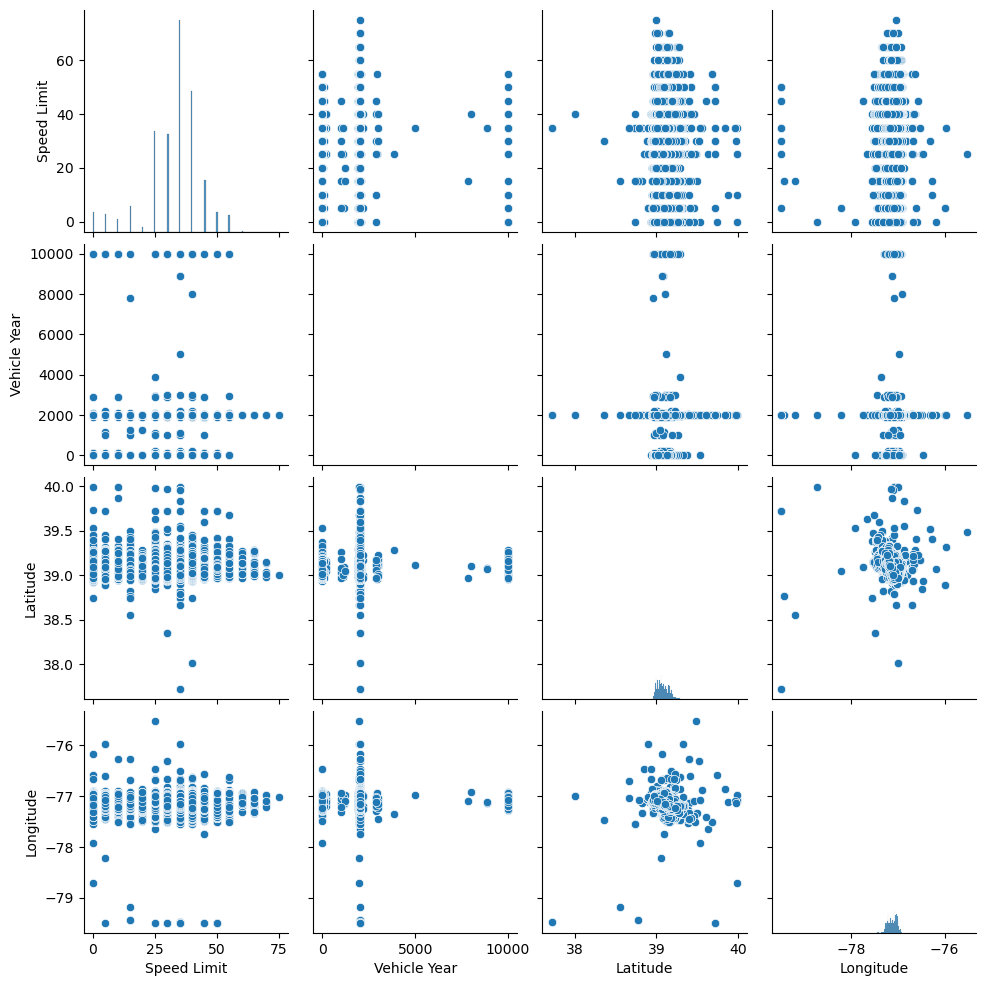

In [244]:
# (2) Use the pair plot to see the distribution and relationship of the numeric data.
# Select numeric columns
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns

#display(numeric_columns)

# Scatter plot matrix or pair plot to visualize the distribution and relationships of these numerical data.
pairplot = sns.pairplot(df1[numeric_columns])
plt.show() 

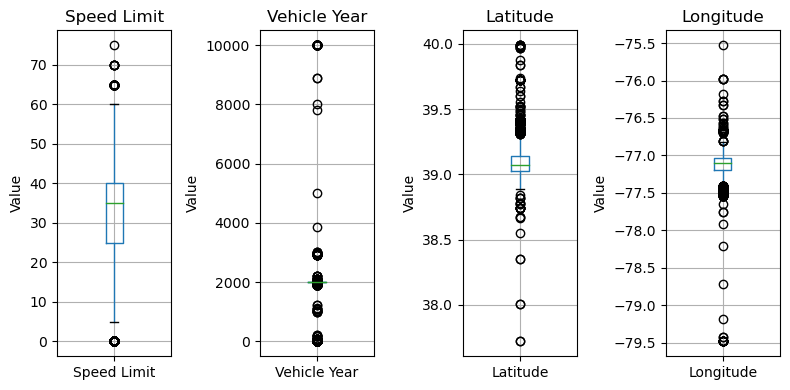

In [245]:
# (3) Use the box plot to visualize the ditribution and outliers of the data.

# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 4, figsize=(8, 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot box plots for each column in a subplot
for i, column_name in enumerate(numeric_columns):
    if i < 4:
        df.boxplot(column=column_name, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_ylabel('Value')
# Adjust layout
plt.tight_layout()
plt.show()

Based on the statistical summary and data visualization, the values in the "Speed Limit", "Latitude", and "Longitude" columns appear to be within reasonable ranges. However, the "Vehicle Year" column contains values that seem abnormal, as years earlier than 1500 or later than 2024 are unlikely given the dataset's last update date of February 9, 2024. To address this issue, we will filter out these values and replace them with "Invalid".

In [246]:
# Replace the values less than 1500 or larger than 2024 in the "Vehicle Year" column with "Invalid"
df1.loc[(df1["Vehicle Year"] < 1500) | (df1["Vehicle Year"] > 2024), "Vehicle Year"] = "Invalid"

In [247]:
#  Verify whether the replacement was successful by checking the unique values in the "Vehicle Year" column.
df1["Vehicle Year"].unique()

array([2004, 2011, 2019, 2016, 2014, 2013, 2020, 2022, 2017, 2008, 2012,
       2015, 2010, 2018, 2007, 2005, 'Invalid', 2003, 2021, 1996, 2023,
       2009, 2006, 1999, 2001, 1997, 2000, 1998, 2002, 1991, 1995, 1992,
       2024, 1994, 1901, 1993, 1900, 1983, 1989, 1990, 1987, 1988, 1984,
       1981, 1986, 1959, 1985, 1969, 1980, 1971, 1978, 1966, 1967, 1975,
       1982, 1965, 1968, 1972, 1970, 1960, 1949, 1911, 1979, 1938, 1976,
       1947, 1961, 1977, 1955, 1974, 1930, 1963, 1946], dtype=object)

#### 1.5 Data normalization or scaling

I plan to retain the specific meanings of the four numerical columns in the dataset and not perform normalization or scaling on them. 

In the case of "Speed limit" and "Vehicle Year," these columns have specific interpretations that are relevant for further analysis.

Moreover, "Latitude" and "Longitude" represent real-world geographic coordinates and do not require normalization or scaling since they already have a specific range (-90 to 90 for latitude and -180 to 180 for longitude) that is meaningful for geographic analysis.

Therefore, it's appropriate to skip normalization or scaling for "Speed limit" and "Vehicle Year," as well as "Latitude" and "Longitude," given their specific meanings and usage in the analysis.

#### 1.6 Encoding categorical data

Given that many categorical features in this dataset carry specific meanings and may not require encoding, it's important to consider which ones could benefit from encoding. 

In this dataset, columns such as 'ACRS Report Type', 'Injury Severity', 'Driver At Fault', and 'Parked Vehicle' could be label encoded to transform them into numerical features for analysis.

Additionally, for the column 'Driverless Vehicle', one-hot encoding could be applied to indicate whether the crash involves a driverless vehicle. 

In [248]:
# (1) label encoding
# I will create new columns to store the data after label encoding since the original columns is still useful for the later visulization.
# Import the necessary dependency

from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()

# Transform the categorical column in the new columns
df1['ACRS Report Type Encoded'] = label_encode.fit_transform(df1['ACRS Report Type'])
df1['Driver At Fault Encoded'] = label_encode.fit_transform(df1['Driver At Fault'])
df1['Parked Vehicle Encoded'] = label_encode.fit_transform(df1['Parked Vehicle'])

# I want to map the severity levels and encoded as numberical values
severity_map = { 'NO APPARENT INJURY': 0,
                'POSSIBLE INJURY': 1,
                'SUSPECTED MINOR INJURY': 2,
                'SUSPECTED SERIOUS INJURY': 3,
                'FATAL INJURY': 4}

df1['Injury Severity Encoded'] = df1['Injury Severity'].map(severity_map)

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_6425/453220083.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ACRS Report Type Encoded'] = label_encode.fit_transform(df1['ACRS Report Type'])
/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_6425/453220083.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Driver At Fault Encoded'] = label_encode.fit_transform(df1['Driver At Fault'])
/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_6425/453220083.py:12: Setting

In [249]:
# (2)Perform the one-hot encoding for the column "Driverless Vehicle"
df1 = pd.get_dummies(df1, columns =["Driverless Vehicle"])

# Convert boolean values to integers (1 for True, 0 for False)
df1['Driverless Vehicle_No'] = df1['Driverless Vehicle_No'].astype(int)
df1['Driverless Vehicle_Unknown'] = df1['Driverless Vehicle_Unknown'].astype(int)

In [250]:
# Check the dataset after encoding
display(df1.head())
display(df1.info())

Report Number Local Case Number                Agency Name  \
0   MCP3040003N         190026050   Montgomery County Police   
1    EJ78850038         230034791  Gaithersburg Police Depar   
2   MCP2009002G         230034583   Montgomery County Police   
3   MCP3201004C         230035036   Montgomery County Police   
4   MCP23290028         230035152   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  05/31/2019 03:00:00 PM    Missing_record   
1  Property Damage Crash  07/21/2023 05:59:00 PM  Maryland (State)   
2  Property Damage Crash  07/20/2023 03:10:00 PM  Maryland (State)   
3  Property Damage Crash  07/23/2023 12:10:00 PM            County   
4  Property Damage Crash  07/24/2023 06:10:00 AM            County   

                Road Name Cross-Street Type  Cross-Street Name  \
0          Missing_record    Missing_record     Missing_record   
1            FREDERICK RD           Unknown    WATKINS MILL RD   
2             GEORGIA AVE  Maryland (State)         NORBECK RD   
3         CRYSTAL ROCK DR            County  WATERS LANDING DR   
4  MONTGOMERY VILLAGE AVE            County       CENTERWAY RD   

            Collision Type  ... Equipment Problems   Latitude  Longitude  \
0                    OTHER  ...            UNKNOWN  39.150044 -77.063089   
1  STRAIGHT MOVEMENT ANGLE  ...          NO MISUSE  39.159264 -77.219025   
2  STRAIGHT MOVEMENT ANGLE  ...          NO MISUSE  39.109535 -77.075806   
3  STRAIGHT MOVEMENT ANGLE  ...          NO MISUSE  39.190149 -77.266766   
4        HEAD ON LEFT TURN  ...          NO MISUSE  39.172558 -77.203745   

                      Location ACRS Report Type Encoded  \
0  (39.15004368, -77.06308884)                        2   
1   (39.1592635, -77.21902483)                        2   
2  (39.10953506, -77.07580619)                        2   
3  (39.19014917, -77.26676583)                        2   
4  (39.17255801, -77.20374546)                        2   

  Driver At Fault Encoded Parked Vehicle Encoded Injury Severity Encoded  \
0                       2                      0                       0   
1                       0                      0                       0   
2                       2                      0                       0   
3                       2                      0                       0   
4                       2                      0                       0   

  Driverless Vehicle_No Driverless Vehicle_Unknown  
0                     1                          0  
1                     1                          0  
2                     1                          0  
3                     1                          0  
4                     1                          0  

[5 rows x 43 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   172105 non-null  object 
 1   Local Case Number               172105 non-null  object 
 2   Agency Name                     172105 non-null  object 
 3   ACRS Report Type                172105 non-null  object 
 4   Crash Date/Time                 172105 non-null  object 
 5   Route Type                      172105 non-null  object 
 6   Road Name                       172105 non-null  object 
 7   Cross-Street Type               172105 non-null  object 
 8   Cross-Street Name               172105 non-null  object 
 9   Collision Type                  172105 non-null  object 
 10  Weather                         172105 non-null  object 
 11  Surface Condition               172105 non-null  object 
 12  Light           

None

#### 1.7  Feature engineering
In line with my analysis plan, I propose the following feature engineering steps:

(1) Create a new column named "Instate Driver" to indicate whether the driver is an in-state driver based on the "Drivers License State" column.

(2) Combine the columns "Weather" and "Surface Condition" into a new column named "Environment Condition" to represent both the weather and surface conditions during the crash event.

In [251]:
# (1) Create a new column named "Instate Driver"
# Create the new column with default value as "OutState Driver"
df1["Instate Driver"] = "OutState Driver"

# Update the value to "Instate Driver" if the 'Drivers License State' is 'MD' (Maryland) since this dataset is from MD state
df1.loc[df1['Drivers License State'] == 'MD', 'Instate Driver'] ='Instate Driver'

# Show the new columns
display(df1.head())
display(df1.info())

Report Number Local Case Number                Agency Name  \
0   MCP3040003N         190026050   Montgomery County Police   
1    EJ78850038         230034791  Gaithersburg Police Depar   
2   MCP2009002G         230034583   Montgomery County Police   
3   MCP3201004C         230035036   Montgomery County Police   
4   MCP23290028         230035152   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  05/31/2019 03:00:00 PM    Missing_record   
1  Property Damage Crash  07/21/2023 05:59:00 PM  Maryland (State)   
2  Property Damage Crash  07/20/2023 03:10:00 PM  Maryland (State)   
3  Property Damage Crash  07/23/2023 12:10:00 PM            County   
4  Property Damage Crash  07/24/2023 06:10:00 AM            County   

                Road Name Cross-Street Type  Cross-Street Name  \
0          Missing_record    Missing_record     Missing_record   
1            FREDERICK RD           Unknown    WATKINS MILL RD   
2             GEORGIA AVE  Maryland (State)         NORBECK RD   
3         CRYSTAL ROCK DR            County  WATERS LANDING DR   
4  MONTGOMERY VILLAGE AVE            County       CENTERWAY RD   

            Collision Type  ...   Latitude  Longitude  \
0                    OTHER  ...  39.150044 -77.063089   
1  STRAIGHT MOVEMENT ANGLE  ...  39.159264 -77.219025   
2  STRAIGHT MOVEMENT ANGLE  ...  39.109535 -77.075806   
3  STRAIGHT MOVEMENT ANGLE  ...  39.190149 -77.266766   
4        HEAD ON LEFT TURN  ...  39.172558 -77.203745   

                      Location ACRS Report Type Encoded  \
0  (39.15004368, -77.06308884)                        2   
1   (39.1592635, -77.21902483)                        2   
2  (39.10953506, -77.07580619)                        2   
3  (39.19014917, -77.26676583)                        2   
4  (39.17255801, -77.20374546)                        2   

  Driver At Fault Encoded Parked Vehicle Encoded Injury Severity Encoded  \
0                       2                      0                       0   
1                       0                      0                       0   
2                       2                      0                       0   
3                       2                      0                       0   
4                       2                      0                       0   

  Driverless Vehicle_No Driverless Vehicle_Unknown   Instate Driver  
0                     1                          0  OutState Driver  
1                     1                          0   Instate Driver  
2                     1                          0   Instate Driver  
3                     1                          0   Instate Driver  
4                     1                          0  OutState Driver  

[5 rows x 44 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   172105 non-null  object 
 1   Local Case Number               172105 non-null  object 
 2   Agency Name                     172105 non-null  object 
 3   ACRS Report Type                172105 non-null  object 
 4   Crash Date/Time                 172105 non-null  object 
 5   Route Type                      172105 non-null  object 
 6   Road Name                       172105 non-null  object 
 7   Cross-Street Type               172105 non-null  object 
 8   Cross-Street Name               172105 non-null  object 
 9   Collision Type                  172105 non-null  object 
 10  Weather                         172105 non-null  object 
 11  Surface Condition               172105 non-null  object 
 12  Light           

None

In [252]:
#(2)Combine the columns "Weather" and "Surface Condition" into a new column
df1['Environment Condition'] = df1['Weather'] + ' & ' + df1['Surface Condition']

# Show the new columns
display(df1.head())

Report Number Local Case Number                Agency Name  \
0   MCP3040003N         190026050   Montgomery County Police   
1    EJ78850038         230034791  Gaithersburg Police Depar   
2   MCP2009002G         230034583   Montgomery County Police   
3   MCP3201004C         230035036   Montgomery County Police   
4   MCP23290028         230035152   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  05/31/2019 03:00:00 PM    Missing_record   
1  Property Damage Crash  07/21/2023 05:59:00 PM  Maryland (State)   
2  Property Damage Crash  07/20/2023 03:10:00 PM  Maryland (State)   
3  Property Damage Crash  07/23/2023 12:10:00 PM            County   
4  Property Damage Crash  07/24/2023 06:10:00 AM            County   

                Road Name Cross-Street Type  Cross-Street Name  \
0          Missing_record    Missing_record     Missing_record   
1            FREDERICK RD           Unknown    WATKINS MILL RD   
2             GEORGIA AVE  Maryland (State)         NORBECK RD   
3         CRYSTAL ROCK DR            County  WATERS LANDING DR   
4  MONTGOMERY VILLAGE AVE            County       CENTERWAY RD   

            Collision Type  ...  Longitude                     Location  \
0                    OTHER  ... -77.063089  (39.15004368, -77.06308884)   
1  STRAIGHT MOVEMENT ANGLE  ... -77.219025   (39.1592635, -77.21902483)   
2  STRAIGHT MOVEMENT ANGLE  ... -77.075806  (39.10953506, -77.07580619)   
3  STRAIGHT MOVEMENT ANGLE  ... -77.266766  (39.19014917, -77.26676583)   
4        HEAD ON LEFT TURN  ... -77.203745  (39.17255801, -77.20374546)   

  ACRS Report Type Encoded Driver At Fault Encoded Parked Vehicle Encoded  \
0                        2                       2                      0   
1                        2                       0                      0   
2                        2                       2                      0   
3                        2                       2                      0   
4                        2                       2                      0   

  Injury Severity Encoded Driverless Vehicle_No Driverless Vehicle_Unknown  \
0                       0                     1                          0   
1                       0                     1                          0   
2                       0                     1                          0   
3                       0                     1                          0   
4                       0                     1                          0   

    Instate Driver   Environment Condition  
0  OutState Driver  CLEAR & Missing_record  
1   Instate Driver             CLEAR & DRY  
2   Instate Driver             CLEAR & DRY  
3   Instate Driver             CLEAR & DRY  
4  OutState Driver            CLOUDY & DRY  

[5 rows x 45 columns]

#### 1.8 Date and time feature extraction
Extract features, including weekday/weekend, year, month, day, hour and daylight/night based on date values in column "Crash Date/Time".

In [253]:
# Convert the values in column "Crash Date/Time" into pandas datetime feature.
df1['Crash Date/Time'] = pd.to_datetime(df1['Crash Date/Time'])

# Extract features from the date/time column
# Weekday
# Map numerical values to day names
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
# Extract weekday features from the date/time column
df1['Crash Weekday'] = df1['Crash Date/Time'].dt.weekday.map(day_map)

# Extract Year, month and date components
df1["Crash Date"] = df1['Crash Date/Time'].dt.date

# Extract Year
df1['Crash Year'] = df1['Crash Date/Time'].dt.year

# Extract Month
df1['Crash Month'] = df1['Crash Date/Time'].dt.month

# Extract Hour 
df1['Crash Hour'] = df1['Crash Date/Time'].dt.hour

# Daytime or not
df1['Is_DayTime'] = (df1['Crash Hour'] >= 6) & (df1['Crash Hour'] < 18)  # I define the daylight is from 6:00 am to 6:00 pm. True if daylight, False if night

# Display the new columns
display (df1.head(10))
display(df1.info())

/var/folders/t0/m35j63d92_l5jr028g67rfzr0000gn/T/ipykernel_6425/4019949792.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Crash Date/Time'] = pd.to_datetime(df1['Crash Date/Time'])


Report Number Local Case Number                Agency Name  \
0   MCP3040003N         190026050   Montgomery County Police   
1    EJ78850038         230034791  Gaithersburg Police Depar   
2   MCP2009002G         230034583   Montgomery County Police   
3   MCP3201004C         230035036   Montgomery County Police   
4   MCP23290028         230035152   Montgomery County Police   
5   MCP295200DV         230032956   Montgomery County Police   
6   MCP33510013         230033282   Montgomery County Police   
7    EJ7869003F         230032124  Gaithersburg Police Depar   
8   MCP3244002K         230034697   Montgomery County Police   
9   MCP2863002V         230034445   Montgomery County Police   

        ACRS Report Type     Crash Date/Time        Route Type  \
0  Property Damage Crash 2019-05-31 15:00:00    Missing_record   
1  Property Damage Crash 2023-07-21 17:59:00  Maryland (State)   
2  Property Damage Crash 2023-07-20 15:10:00  Maryland (State)   
3  Property Damage Crash 2023-07-23 12:10:00            County   
4  Property Damage Crash 2023-07-24 06:10:00            County   
5  Property Damage Crash 2023-07-11 07:40:00            County   
6  Property Damage Crash 2023-07-12 20:28:00  Maryland (State)   
7           Injury Crash 2023-07-05 23:25:00  Maryland (State)   
8  Property Damage Crash 2023-07-21 07:14:00        US (State)   
9  Property Damage Crash 2023-07-19 19:00:00  Maryland (State)   

                Road Name Cross-Street Type                Cross-Street Name  \
0          Missing_record    Missing_record                   Missing_record   
1            FREDERICK RD           Unknown                  WATKINS MILL RD   
2             GEORGIA AVE  Maryland (State)                       NORBECK RD   
3         CRYSTAL ROCK DR            County                WATERS LANDING DR   
4  MONTGOMERY VILLAGE AVE            County                     CENTERWAY RD   
5               WAYNE AVE            County                            ALLEY   
6           COLESVILLE RD        US (State)                    COLESVILLE RD   
7              CLOPPER RD           Unknown  STRUC #15093 GREAT SENECA CREEK   
8             GEORGIA AVE           Unknown        NW EASTERN AVE (DC MAINT)   
9            WOODFIELD RD            County                    MIDCOUNTY HWY   

            Collision Type  ... Driverless Vehicle_No  \
0                    OTHER  ...                     1   
1  STRAIGHT MOVEMENT ANGLE  ...                     1   
2  STRAIGHT MOVEMENT ANGLE  ...                     1   
3  STRAIGHT MOVEMENT ANGLE  ...                     1   
4        HEAD ON LEFT TURN  ...                     1   
5        SAME DIR REAR END  ...                     1   
6        SAME DIR REAR END  ...                     1   
7           SINGLE VEHICLE  ...                     1   
8        SAME DIR REAR END  ...                     1   
9        SAME DIR REAR END  ...                     1   

  Driverless Vehicle_Unknown   Instate Driver   Environment Condition  \
0                          0  OutState Driver  CLEAR & Missing_record   
1                          0   Instate Driver             CLEAR & DRY   
2                          0   Instate Driver             CLEAR & DRY   
3                          0   Instate Driver             CLEAR & DRY   
4                          0  OutState Driver            CLOUDY & DRY   
5                          0   Instate Driver             CLEAR & DRY   
6                          0   Instate Driver             CLEAR & DRY   
7                          0   Instate Driver             CLEAR & DRY   
8                          0  OutState Driver             CLEAR & DRY   
9                          0   Instate Driver             CLEAR & DRY   

  Crash Weekday  Crash Date Crash Year Crash Month Crash Hour Is_DayTime  
0        Friday  2019-05-31       2019           5         15       True  
1        Friday  2023-07-21       2023           7         17       True  
2      Thursday  2023-07-20     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Report Number                   172105 non-null  object        
 1   Local Case Number               172105 non-null  object        
 2   Agency Name                     172105 non-null  object        
 3   ACRS Report Type                172105 non-null  object        
 4   Crash Date/Time                 172105 non-null  datetime64[ns]
 5   Route Type                      172105 non-null  object        
 6   Road Name                       172105 non-null  object        
 7   Cross-Street Type               172105 non-null  object        
 8   Cross-Street Name               172105 non-null  object        
 9   Collision Type                  172105 non-null  object        
 10  Weather                         172105 non-null  object 

None

### 2. Create 15 distinct visualizations

#### 2.1 Line chart showing the change in the number of crashes over the years.

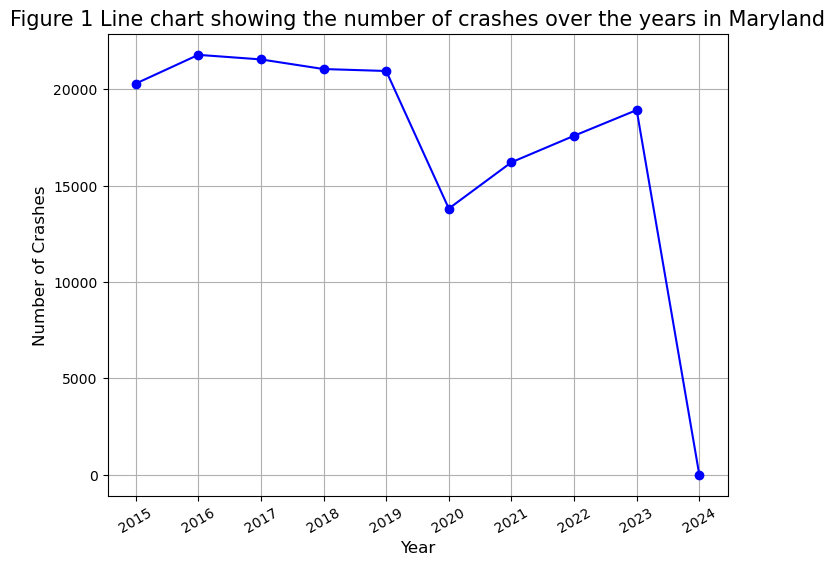

In [254]:
# Group the crash record by 'Crash Year' and count the number of crashes in each year
crashes_by_year = df1.groupby('Crash Year').size()

# Plot the line chart
plt.figure(figsize=(8, 6))
plt.plot(crashes_by_year.index, crashes_by_year.values, marker='o',linestyle='-', color = "Blue")
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Crashes', fontsize = 12)
plt.title('Figure 1 Line chart showing the number of crashes over the years in Maryland', fontsize =15)
plt.xticks(crashes_by_year.index, rotation = 30)
plt.grid(True)
plt.show()

Based on the line chart depicting the number of crashes over the years in Maryland, it's evident that from 2015 to 2019, the crash numbers remained relatively stable, hovering around 20,000 incidents. However, in 2020, there was a noticeable decrease in crashes, likely attributed to the COVID-19 pandemic and the subsequent decrease in outdoor activities and travel. As the COVID-19 situation improved, the number of crashes began to rise again in the following years, indicating a return to normalcy in outdoor activities and travel. It's important to note that the data for 2024 only includes two months (as of February), so the lower number of crashes for that year is expected.

#### 2.2 Stacked bar chart showing the change in the number of crashes by weekdays and report type from 2015 to 2024 .

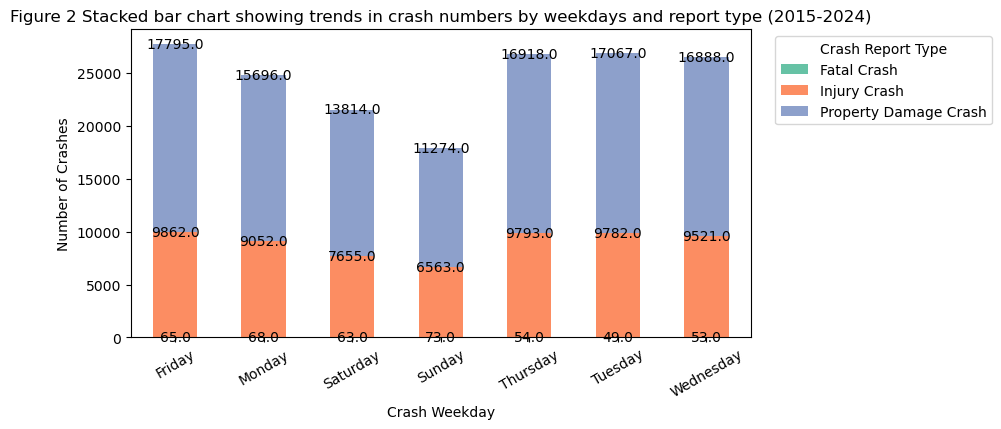

In [255]:
# Set the color palette
sns.set_palette("Set2")

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 4))

# Group the crash records by 'Crash Weekday' and 'ACRS Report Type' and count the number of crashes in each category
crashes_by_weekday_type = df1.groupby(['Crash Weekday', 'ACRS Report Type']).size().unstack()

# Plot stacked bar chart
crashes_by_weekday_type.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_title('Figure 2 Stacked bar chart showing trends in crash numbers by weekdays and report type (2015-2024)')
ax.set_xlabel('Crash Weekday')
ax.set_ylabel('Number of Crashes')
plt.xticks(rotation = 30)

# Annotate values on each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='center')
    
# Show legend
ax.legend(title='Crash Report Type',bbox_to_anchor=(1.4, 1), loc = "upper right")
plt.show()


The bar chart illustrates the fluctuation in crash numbers categorized by weekdays and report types from 2015 to 2024. Observations indicate that Fridays witness the highest crash occurrences, while Sundays experience the least. This unexpected trend might be attributed to increased activity and excitement on Fridays, potentially leading to a higher likelihood of accidents. Conversely, weekends, especially Saturdays and Sundays, tend to see fewer crashes, possibly due to heightened caution among individuals during leisure time.

From Tuesday to Wednesday, crash numbers remain relatively stable, indicating consistent patterns during midweek days. Notably, property damage crashes emerge as the most frequent, followed by injury crashes, constituting approximately half the frequency of property damage crashes. Fatal crashes, on the other hand, exhibit lower occurrences throughout the weekdays.

#### 2.3 Count plot showing the number of crashes by month and report type from 2015 to 2024.

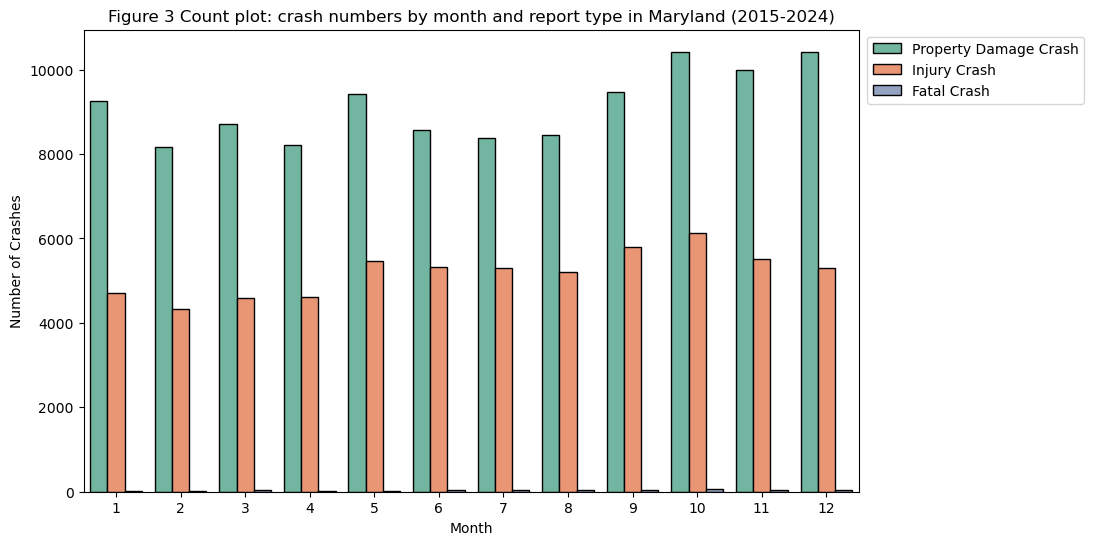

In [256]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
sns.countplot(data=df1, x='Crash Month', hue='ACRS Report Type', palette = "Set2", edgecolor = "black", lw =1)

# Set the title and labels
plt.title('Figure 3 Count plot: crash numbers by month and report type in Maryland (2015-2024)')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
# Change legend position 
plt.legend(bbox_to_anchor=(1.3, 1), loc = "upper right")
plt.show()

From Figure 3, the countplot indicates a stable trend in crash numbers across different months, averaging around 15,000 incidents. Notably, October appears to have a higher frequency of crashes, while the winter months, spanning from September to December, exhibit elevated crash rates. This pattern may be attributed to adverse weather conditions and deteriorating road surface conditions during the colder months, leading to increased accident risks.

Furthermore, property damage crashes emerge as the most prevalent type across the 12-month period, surpassing other crash categories in frequency.

#### 2.4 Scatter plot showing the relationship betweent "Speed Limit" , "Injury Severity Encoded" and "ACRS Report Type"

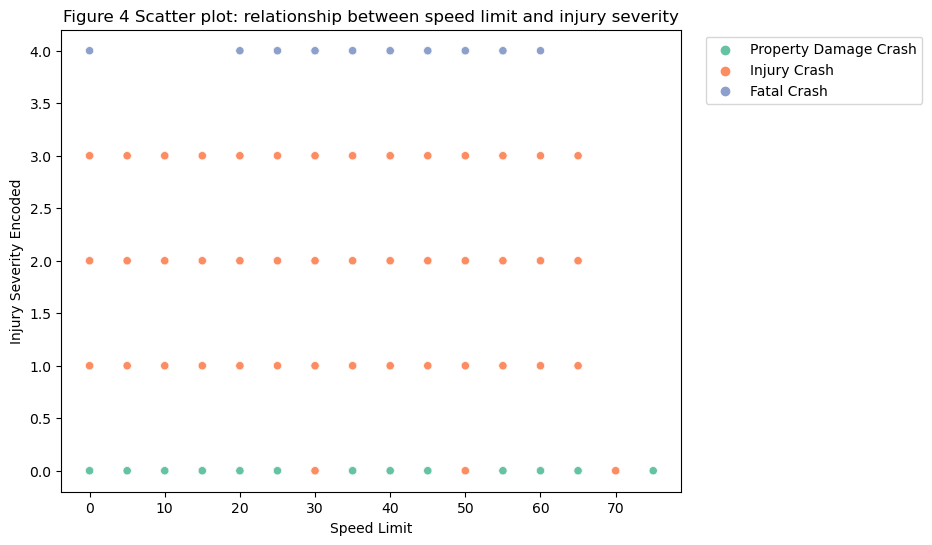

In [257]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x="Speed Limit", y="Injury Severity Encoded", hue = "ACRS Report Type")
plt.title("Figure 4 Scatter plot: relationship between speed limit and injury severity")
plt.xlabel("Speed Limit")
plt.ylabel("Injury Severity Encoded")
plt.legend(bbox_to_anchor=(1.4,1), loc="upper right")
plt.show()

From the scatter plot, it can be observed that various speed limits are associated with all types of crash severities, suggesting that there is no distinct relationship between speed limit and injury severity. Additionally, we note a positive correlation between the severity of crashes and the injury type. Fatal crashes exhibit the highest level of injury severity, followed by Injury crashes categorized as severity levels 1 to 3, while crashes with severity level 0 are typically Property Damage crashes or less severe Injury crashes.

#### 2.5 Pie Chart: Weather and Surface Condition Frequency in Crashes

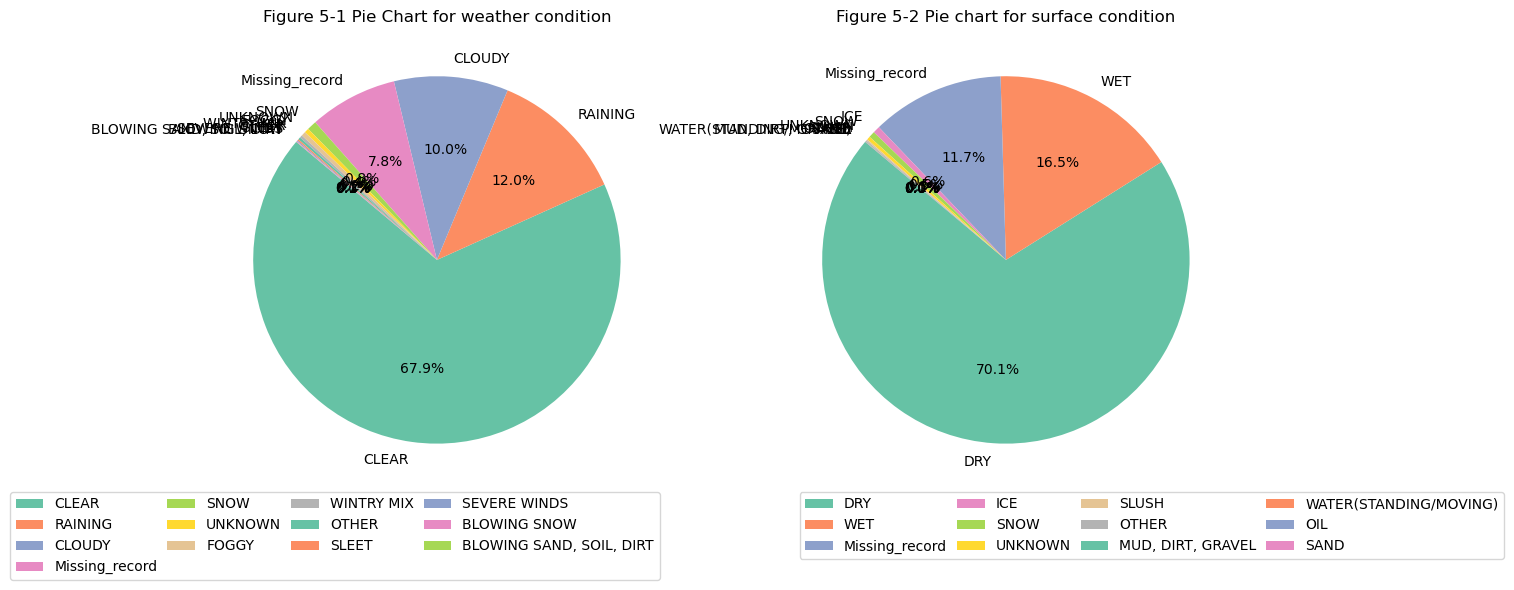

In [258]:
# Calculate the frequency of each category in the 'Weather' column
wc = df1['Weather'].value_counts()

# Calculate the frequency of each category in the 'Surface Condition' column
sc = df1['Surface Condition'].value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot pie charts for 'Surface Condition', 'Weather', and 'Environment Condition' in subplots
axes[0].pie(wc, labels=wc.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Figure 5-1 Pie Chart for weather condition')
axes[0].legend(bbox_to_anchor=(0.0, 0.1, 1, -0.09), ncol=4, columnspacing=0.7)

axes[1].pie(sc, labels=sc.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Figure 5-2 Pie chart for surface condition')
axes[1].legend(bbox_to_anchor=(0.6, 0.1, 1, -0.09), ncol=4, columnspacing=0.7)
    
plt.tight_layout()
plt.show()

From the pie charts, it's evident that the majority of crashes occurred under dry weather conditions and on dry road surfaces. The second most common scenario involves rainy weather conditions and wet road surfaces. While weather conditions may influence crash occurrence, they do not solely determine the reasons for crashes. Notably, Maryland experiences snowy and rainy seasons, suggesting a potential correlation between weather conditions and crash incidence during these periods. Further exploration of this relationship could be beneficial in future analyses.

#### 2.6 Pie Chart: Top 10 Vehicle Years and Top 10 Vehicle Makers in Crashes

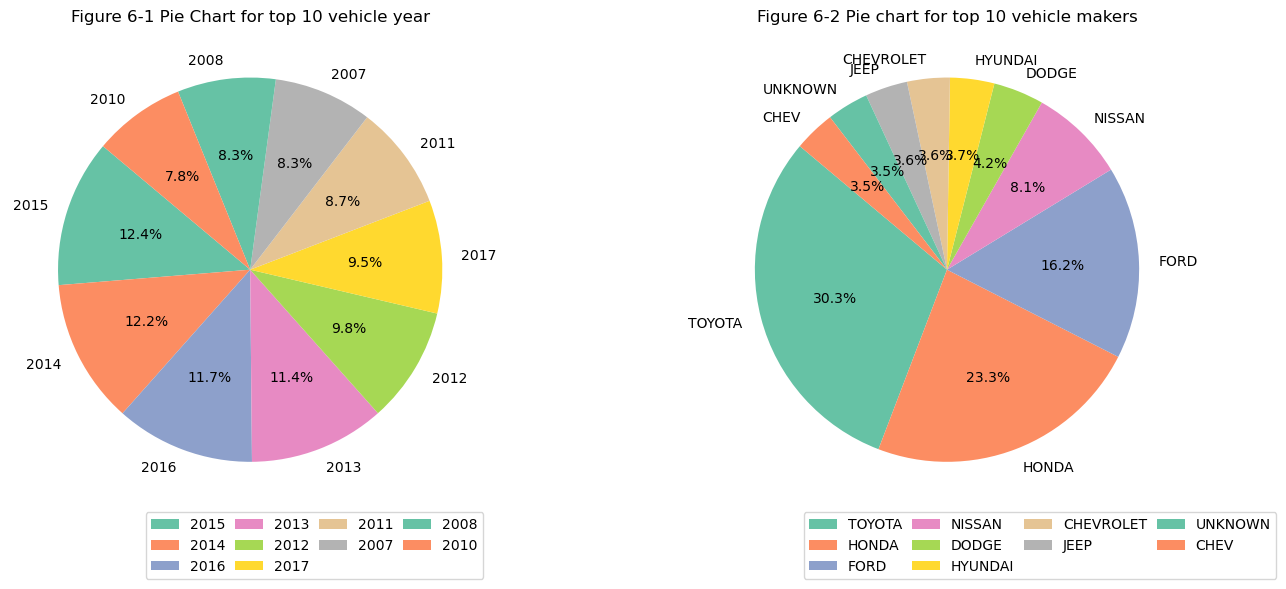

In [259]:
# Calculate the frequency of each category in the 'Vehicle Year' column
vy = df1['Vehicle Year'].value_counts()

# Calculate the frequency of each category in the 'Vehicle Make' column
vm = df1['Vehicle Make'].value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot pie charts for the top 10 categories for 'Vehicle Year'and 'Vehicle Make' in subplots
axes[0].pie(vy.head(10), labels=vy.head(10).index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Figure 6-1 Pie Chart for top 10 vehicle year')
axes[0].legend(bbox_to_anchor=(0.0, 0.1, 1, -0.09), ncol=4, columnspacing=0.7)

axes[1].pie(vm.head(10), labels=vm.head(10).index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Figure 6-2 Pie chart for top 10 vehicle makers')
axes[1].legend(bbox_to_anchor=(0.2, 0.1, 1, -0.09), ncol=4, columnspacing=0.7)
    
plt.tight_layout()
plt.show()

The pie charts reveal that the most frequent vehicle involved in crashes is from the year 2015 and made by TOYOTA(30.3%). This is likely because TOYOTA is a popular car brand in Maryland, resulting in more involvement in crashes. Similarly, the abundance of 2015 vehicles(12.4%) may be due to the demographics of Maryland residents, where many own vehicles from that year. The second and third most frequent years and makers are 2014 (12.2%) and 2016 (11.7%), HONDA(23.3%), and FORD (16.2%), respectively. I'll further explore the relationship between vehicle year, maker, and injury severity in future analyses.

#### 2.7 Catplot shows the distribution of injury severity levels (encoded) within each of the top 10 vehicle makers

/Users/xiexiaoyang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x2000 with 0 Axes>

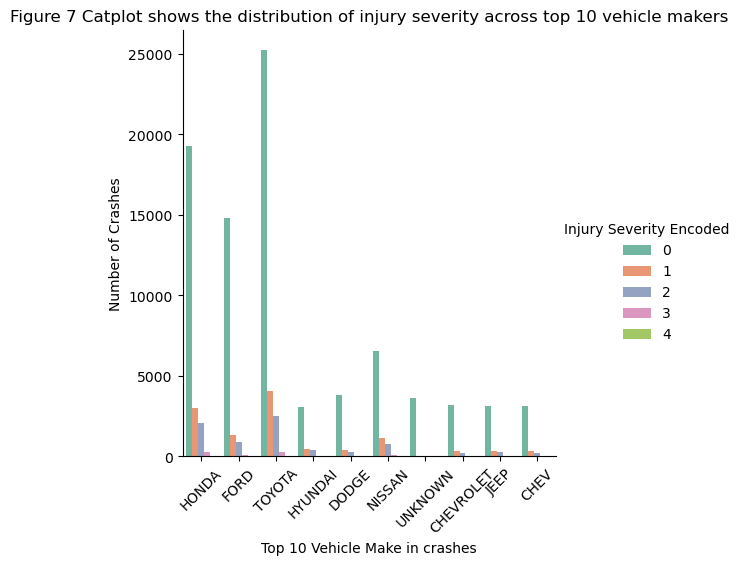

In [260]:
# Get the top 10 vehicle makers
top_10_makers = vm.head(10).index

# Filter the dataframe to include only the top 10 makers
df_top_10_makers = df1[df1['Vehicle Make'].isin(top_10_makers)]

# Plot the catplot
plt.figure(figsize=(6, 20))
sns.catplot(data=df_top_10_makers, x='Vehicle Make', hue='Injury Severity Encoded', kind='count')
plt.title('Figure 7 Catplot shows the distribution of injury severity across top 10 vehicle makers')
plt.xlabel('Top 10 Vehicle Make in crashes')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

From the catplot above, we observe that injury severity does not appear to be strongly associated with vehicle makers, as there is no significant concentration of high severity injuries within any specific makers. The injury severity is encoded as follows: 'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'SUSPECTED SERIOUS INJURY': 2, 'POSSIBLE INJURY': 3, 'FATAL INJURY': 4. Across most makers, the majority of injuries are classified as 'NO APPARENT INJURY'. However, there is a slightly higher percentage of level 1 to 3 injuries observed in the top 3 makers: TOYOTA, HONDA, and Ford. This could be attributed to the higher frequency of crashes involving these makers.

#### 2.8 Histogram illustrating the distribution of crash occurrences across hours 

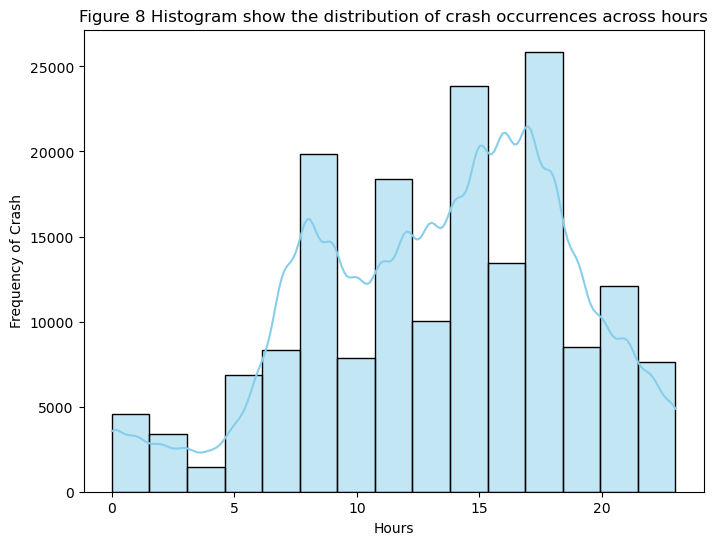

In [261]:
# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df1["Crash Hour"], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title("Figure 8 Histogram show the distribution of crash occurrences across hours")
plt.xlabel("Hours")
plt.ylabel("Frequency of Crash")
plt.show()

From the histogram above, we observe that crashes tend to occur primarily during the morning hours (around 9:00 AM) and afternoon hours (around 2:00 PM to 4:00 PM). Conversely, there are fewer crashes during the late night and early morning hours, typically between 3:00 AM and 4:00 AM. This pattern is logical, as increased traffic during commuting hours contributes to more collisions, whereas fewer vehicles on the road during the early morning and late night hours result in fewer incidents.

#### 2.9 Distribution plot illustrating the distribution of crash occurrences accross date.
Subplot will be showed to illustrate the distribution of crash occurrences at different time periods.

/Users/xiexiaoyang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Figure 9 Distribution plot shows the distribution of crash occurrences accross date')

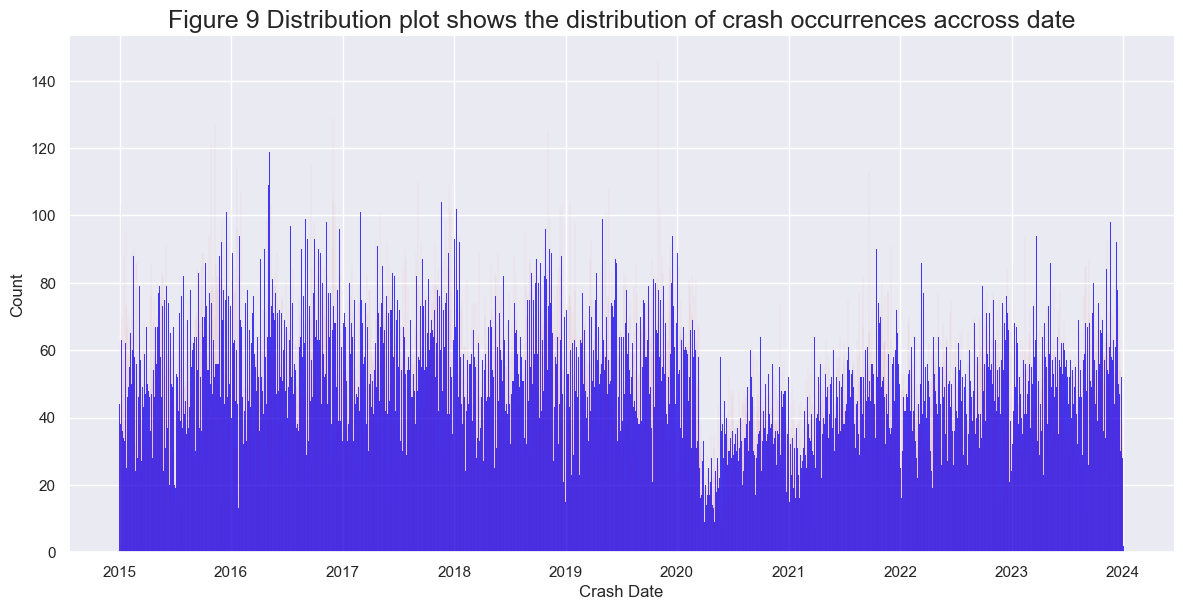

In [262]:
# Distribution plot
sns.set(style = "darkgrid")
sns.displot(data = df1 , x = "Crash Date", bins = 20 , color = "blue", edgecolor = "red" , 
            linestyle = "--", height=6, aspect=2)
plt.title("Figure 9 Distribution plot shows the distribution of crash occurrences accross date", fontsize = 18)

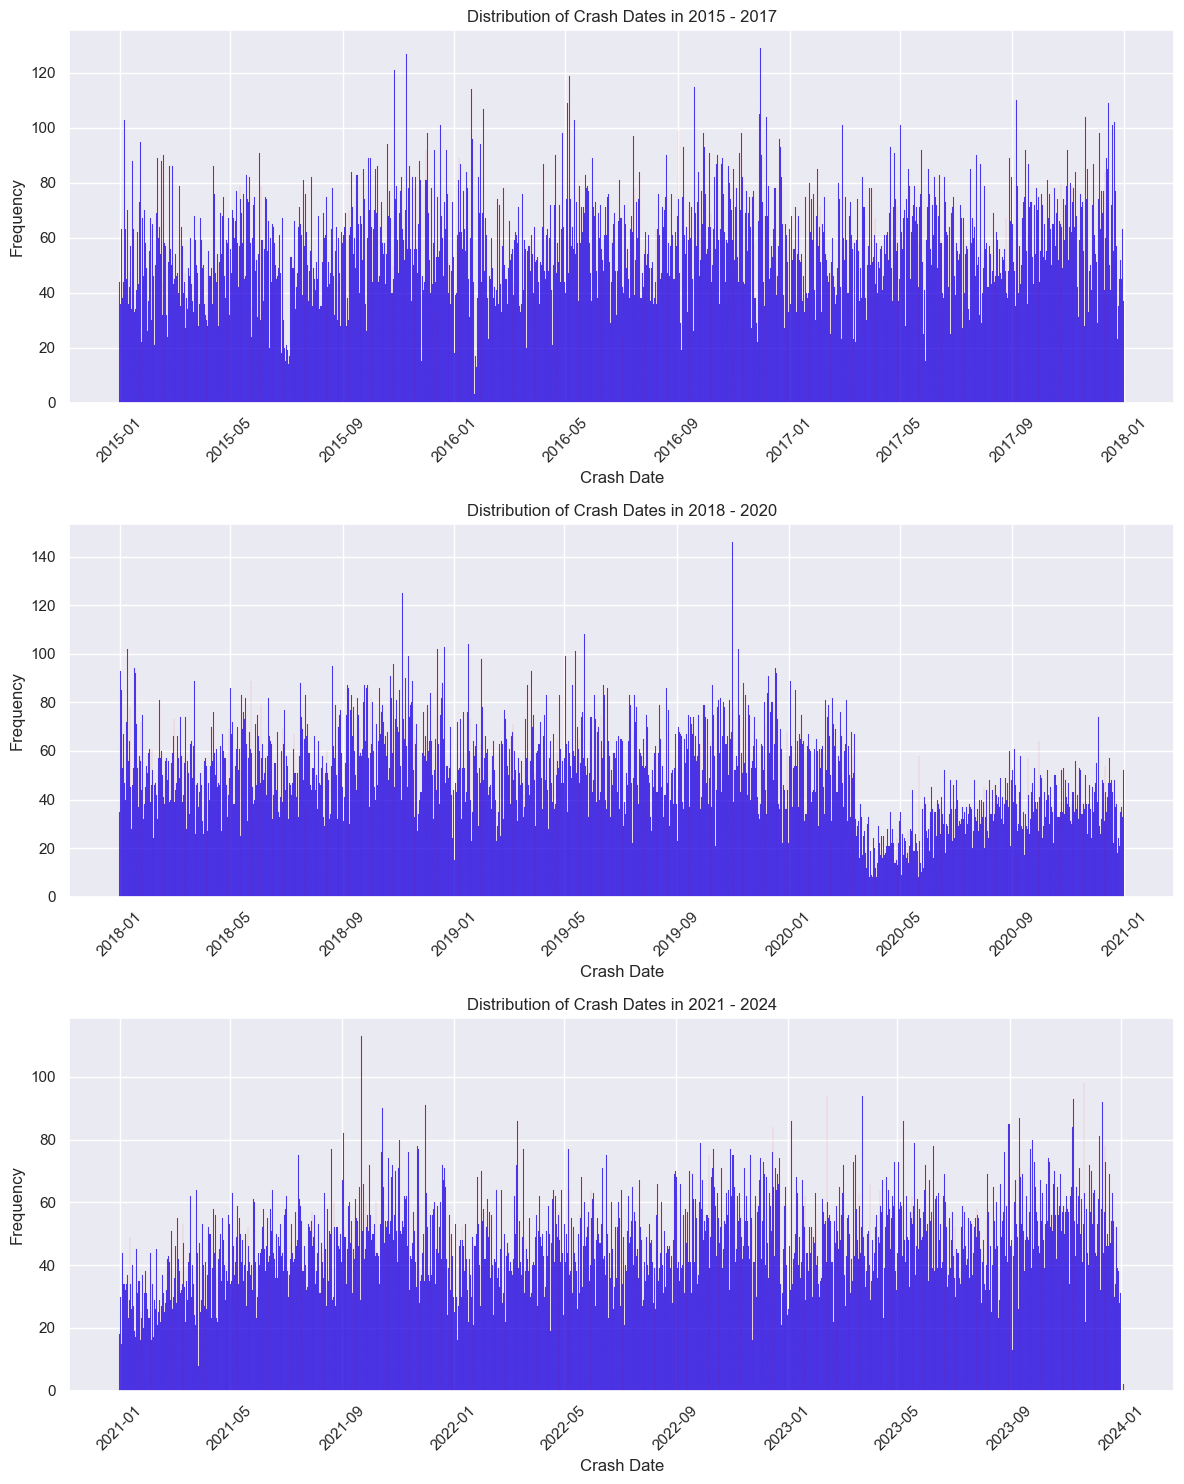

In [263]:
# Subplot to look deep into the data

# Create subplots for each year range
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Define the year ranges
year_ranges = [(2015, 2017), (2018, 2020), (2021, 2024)]

# Set the style for all subplots
sns.set(style="darkgrid")

# Plot distribution of crash dates for each year range
for i, (start_year, end_year) in enumerate(year_ranges):
    # Filter the dataframe for the desired year range
    df_year_range = df1[(df1['Crash Date/Time'].dt.year >= start_year) & (df1['Crash Date/Time'].dt.year <= end_year)]
    
    # Plot the distribution of crash dates
    sns.histplot(data=df_year_range, x="Crash Date", bins=20, color="blue", lw=2,
                 edgecolor="red", linestyle="--", ax=axes[i])
    
    # Set title, labels, and rotation for x-axis ticks
    axes[i].set_title(f'Distribution of Crash Dates in {start_year} - {end_year}')
    axes[i].set_xlabel('Crash Date')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

From the distribution plot, we observe a consistent pattern in crash counts across the years, with the exception of a notable decrease from 2020 to 2021, possibly due to the COVID-19 pandemic. Additionally, each year exhibits a peak in crash frequency during the winter months, particularly around September to December.

#### 2.10 Geograhic plot shows the location of crash. Choropleth Maps

In [264]:
#Install and import the necessary libraires

# !pip install descartes
# !pip install geopandas 

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

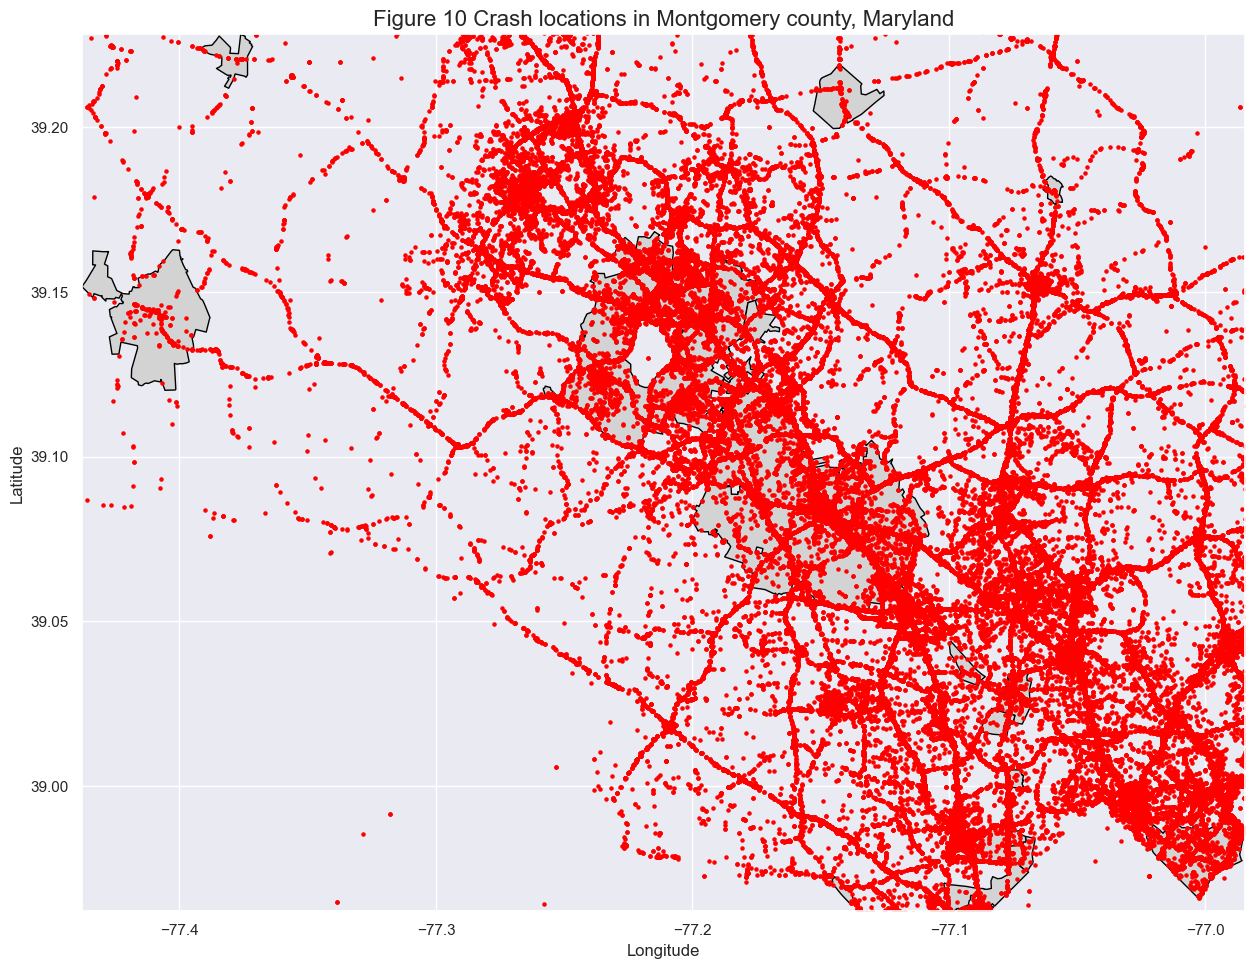

In [265]:
# Download the shape-file(.shp file) for US Census Bureau
# This is the link I got the necessary files: https://www.census.gov/geo/partnerships/pvs/partnership23v2/st24_md.html

# 1. Import the shape file of Montgomery County in Maryland State.
Montgomery_map = gpd.read_file("PVS_23_v2_place_24031.shp")

# 2. Create points as a data point for map
geometry = [Point(xy) for xy in zip(df1['Longitude'], df1['Latitude'])]

# 3. Create the geographic dataframe
geo_df1 = gpd.GeoDataFrame(df1, crs=Montgomery_map.crs, geometry=geometry)

# Plot the map and crash locations
fig, ax = plt.subplots(figsize=(15, 15))
Montgomery_map.plot(ax=ax, color='lightgrey', edgecolor='black')

# Set the plot extent based on the bounds of the Montgomery County map
minx, miny, maxx, maxy = Montgomery_map.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

geo_df1.plot(ax=ax, color='red', markersize=5)  # Plot crash locations

plt.title('Figure 10 Crash locations in Montgomery county, Maryland', size = 16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

From the geographic map, we observe that the crashes exhibit a high density in the county center as well as along local roadways. Some data points lie outside the boundaries of Montgomery County, which is attributed to the dataset encompassing collisions occurring on county and local roadways within the county. Attempting to visualize the entire state of Maryland on the state map proved challenging due to its size and can not see the detailed information. Hence, we opted to employ the Montgomery County map for geographic visualization. 

Notably, within the latitude range of 39.1 to 38.95 and longitude range of -77.1 to -77, latitude 29.2 to 29.15 and longitude -77.3 to -77.15, as well as the center of county, there is a notable concentration of crashes. In addition, intersections of roads experience a higher frequency of crashes, as evidenced by the accumulation of data points at these intersections.

#### 2.11 Bar plot illustratining the Route Type of the crash.

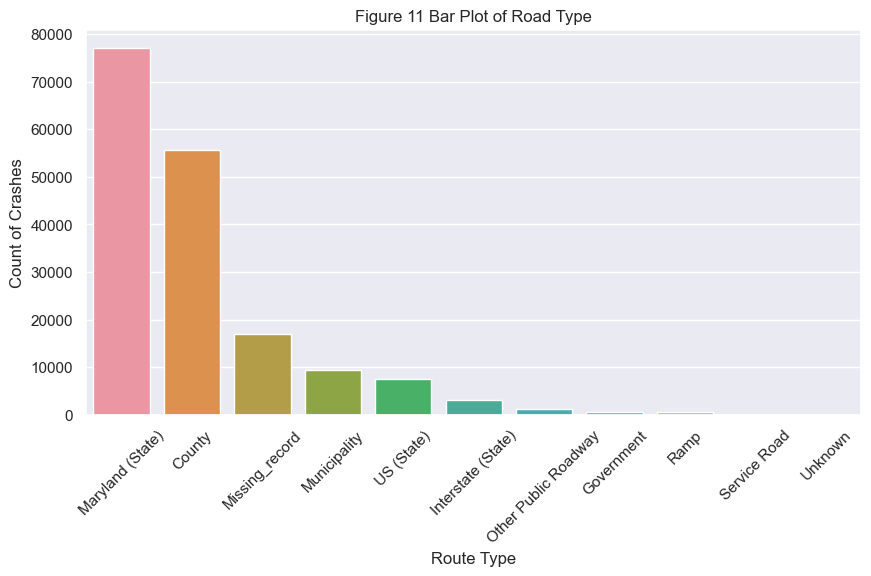

In [266]:
# Aggregate the data by counting the occurrences of each category in column "Route Type:
counts = df1['Route Type'].value_counts()

# Create a swarm plot
plt.figure(figsize=(10, 5))
sns.barplot(x=counts.index, y=counts.values,errorbar = "sd")
plt.title('Figure 11 Bar Plot of Road Type')
plt.xlabel('Route Type')
plt.ylabel('Count of Crashes')
plt.xticks(rotation=45)  
plt.show()

From Figure 11, the majority of crashes occur on state roads within the county, followed by local county roads. Conversely, service roads and ramps exhibit fewer crashes. State roads often include highways with higher traffic volumes and faster speeds. Conversely, service roads and ramps typically have lower speed limits, more warning signs, and require heightened attention from drivers. It's worth noting that there may be fewer records for US state roads and interstate roads, as this dataset focuses on local roadways within Montgomery County.

#### 2.12 Heatmap show the count of  injury severity by driver substance abuse

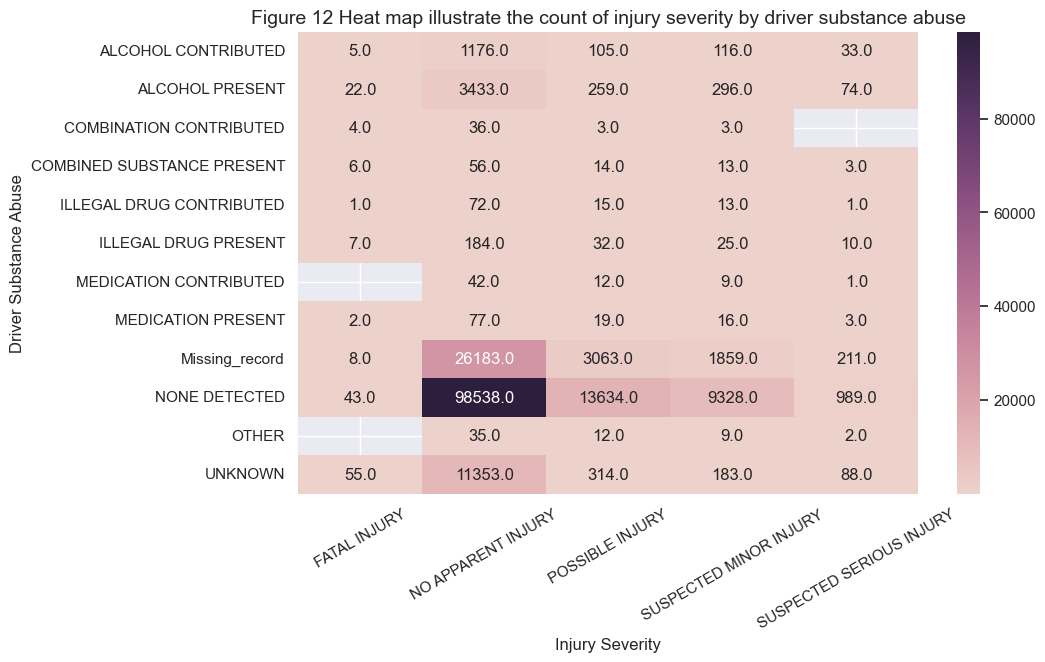

In [267]:
# Heat map
plt.figure(figsize=(10, 6))
sns.heatmap(data=df1.pivot_table(index='Driver Substance Abuse', columns='Injury Severity', aggfunc='size'),
                      annot=True, fmt=".1f", cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Figure 12 Heat map illustrate the count of injury severity by driver substance abuse', size = 14)
plt.xlabel('Injury Severity')
plt.ylabel('Driver Substance Abuse')
plt.xticks(rotation =30)
plt.show()

From the heatmap, "No Apparent Injury" is most frequently associated with "None Detected" substance abuse. Additionally, "No Apparent Injury" is also associated with all other four levels of injury. However, it's noteworthy that for records labeled as "Unknown", "Missing_record", or "None Detected," "Alcohol Present" is the most frequent substance abuse across all types of injury.

In cases of "Fatal Injury" and "Suspected Serious Injury," besides the instances categorized as "None Detected," "Unknown," "Missing_record", or alcohol-related, "Illegal Drug Present" contributes as the fifth most common substance abuse.

#### 2.13 Bar plot shows the crash occurrences of top 15 category in "Vehicle Body Type"

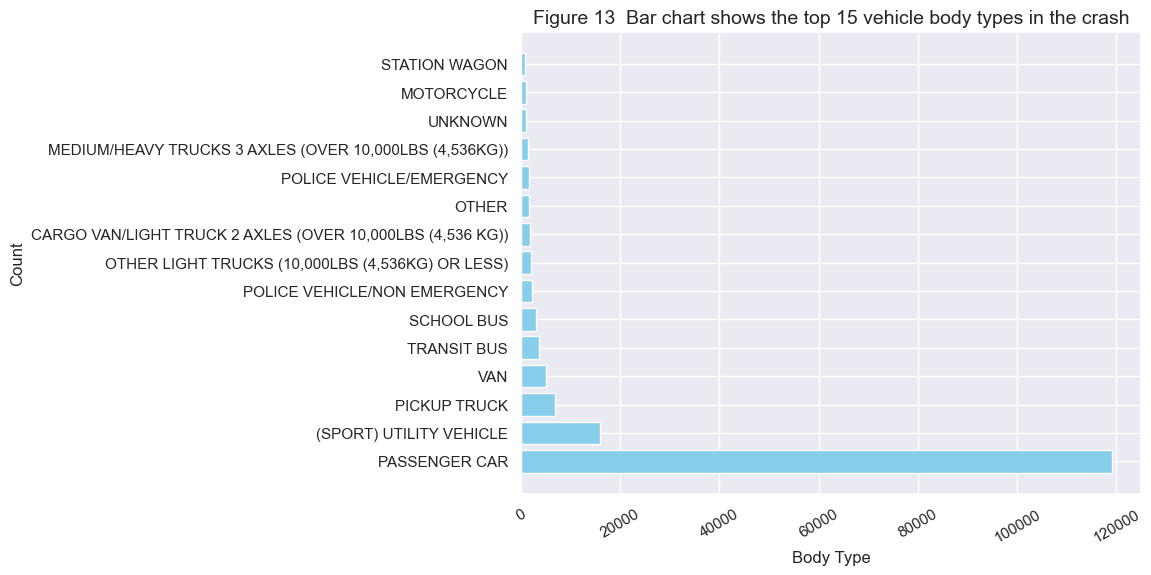

In [268]:
# Count occurrences of each category in 'Vehicle_Body_Type' and select the top 15
vehicle_body_counts = df['Vehicle Body Type'].value_counts().head(15)

# Plot a bar plot
plt.figure(figsize=(8,6))
plt.barh(vehicle_body_counts.index, vehicle_body_counts.values, color='skyblue')
plt.title('Figure 13  Bar chart shows the top 15 vehicle body types in the crash', size = 14)
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

From the figure, the most frequent vehicle type in the crash is the passanger car, and then the Utility vehicle, Pickup truck. It is interesting to see the other vehicle types in the top 10 are the Van,truck or bus those biger size vehicle. 

#### 2.14 Pie chart show the top 10 Driver license state in the crash 

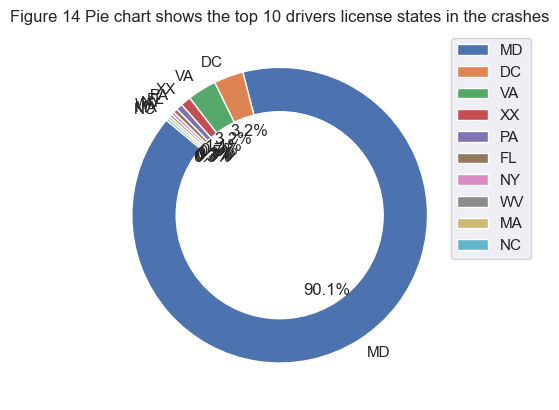

In [269]:
# Count occurrences of each category in 'Drivers License State' and select the top 10
license_counts = df['Drivers License State'].value_counts().head(10)

# Plot the pie chart
plt.pie(license_counts, labels=license_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Figure 14 Pie chart shows the top 10 drivers license states in the crashes')
plt.legend(bbox_to_anchor = (0.6, 0.5, 0.6,0.5), loc="upper right")
centre_white = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_white)
plt.show()

From the pie chart, we can observe that the most frequent state is MD (Maryland), indicating that most of the crashes are associated with in-state drivers. Following MD, DC (Washington, DC) and VA (Virginia) are the next most frequent states, which could be attributed to their proximity to Maryland.

#### 2.15  Word cloud shows the frequent things distract the drivers.

In [270]:
# !pip install wordcloud matplotlib
# Import the necessaey dependencies and libraries
from wordcloud import WordCloud
import re

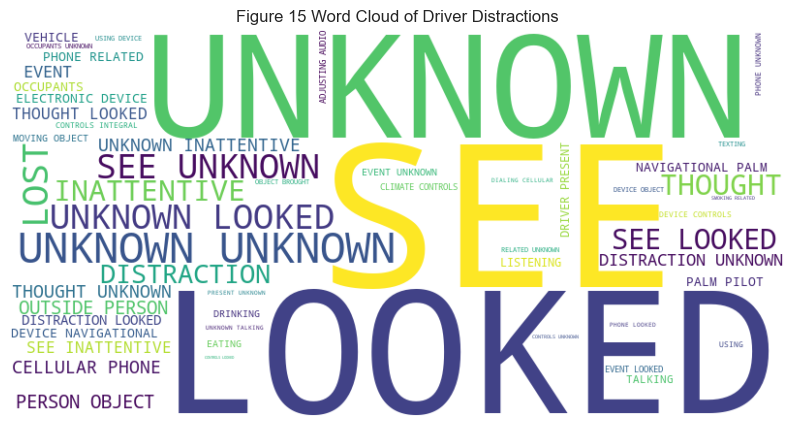

In [271]:
# Combine all text from the "Driver Distracted By" column into a single string
distracted_word = ' '.join(df1['Driver Distracted By'].dropna())

# Word " Distracted" has high frequency in the data but meaningless, I will remove this word before making the word cloud.
# Remove the word "Distracted" from the text
text_wo_distracted = re.sub(r'\bdistracted\b', '',distracted_word, flags=re.IGNORECASE)

# Create the word cloud data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_wo_distracted)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Figure 15 Word Cloud of Driver Distractions')
plt.show()

From the word cloud visualization, we observe that words such as "LOOKED," "SEE," "UNKNOWN," "LOST," "INATTENTIVE," "OUTSIDE PERSON," and "THOUGHT" are prevalent, suggesting that many crashes are attributed to distractions stemming from lack of attention and visual or mental preoccupation. 

Additionally, terms like "LISTENING," "ELECTRONIC DEVICE," "NAVIGATION," and "PHONE RELATED" stand out, underscoring the significance of distractions related to activities such as using electronic devices and navigation systems.

### 3. Correlation matrix of numerical features

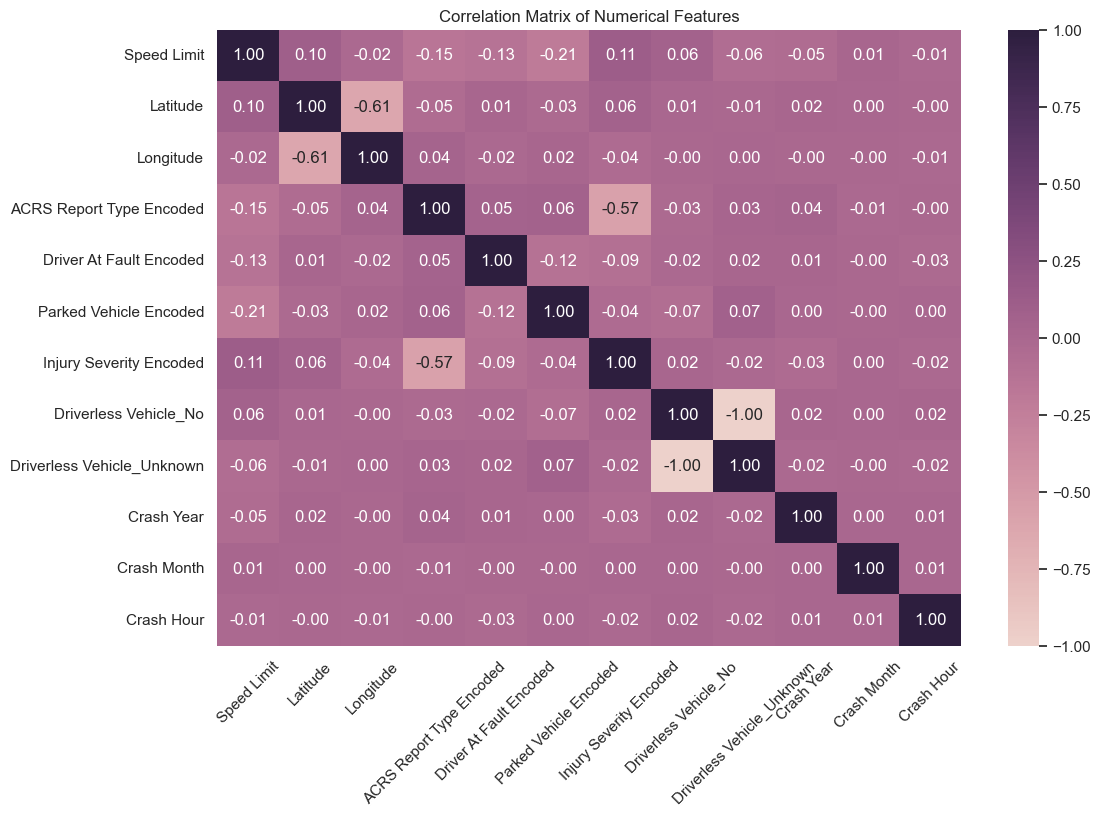

In [272]:
# Filter the numerical features by dropping the non-numeric columns
numeric_df = df1.select_dtypes(include='number')
#display(numeric_df.info())

# Create the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation =45)
plt.show()

From the correlation matrix figure, it's evident that no specific columns exhibit high correlation (above 0.8 or below -0.8) among these numerical features. This observation aligns with the real-world interpretation of these features in this dataset. 

The negative correlation observed between "Driverless Vehicle_No" and"Driverless Vehicle_Unknown" arises due to the binary data type generated from the original column. 

Similarly, the negative correlation between "Longitude" and "Latitude," as well as "ACRS Report Type Encoded" and "Injury Severity Encoded," can be explained logically.

The negative relation between "Longitude" and "Latitude" is intuitive, as these represent spatial coordinates. Additionally, the correlation between "ACRS Report Type Encoded" and "Injury Severity Encoded" reflects the encoding of crash types and injury severities. Specifically, "ACRS Report Type Encoded" assigns larger numbers to property crashes and smaller numbers to fatal crashes, while "Injury Severity Encoded" assigns higher severity levels larger numbers.

# Task 2 

In [273]:
# Load the data, check the data structure and information.
# I had uploaded the dataset into jupyter notebook folder
df_t2 = pd.read_csv("cirrhosis.csv")

In [274]:
# Display the dataset and the detailed information
display(df_t2.head())
display(df_t2.info())
display(df_t2.describe())

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

None

ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   26.350000      33.000000   
25%      3.242500   41.250000    871.500000   80.600000      84.250000   
50%      3.530000   73.000000   1259.000000  114.700000     108.000000   
75%      3.770000  123.000000   1980.000000  151.900000     151.000000   
max      4.640000  588.000000  13862.400000  457.250000     598.000000   

        Platelets  Prothrombin       Stage  
count  407.000000   416.000000  412.000000  
mean   257.024570    10.731731    3.024272  
std     98.325585     1.022000    0.882042  
min     62.000000     9.000000    1.000000  
25%    188.500000    10.000000    2.000000  
50%    251.000000    10.600000    3.000000  
75%    318.000000    11.100000    4.000000  
max    721.000000    18.000000    4.000000

This dataset comprises 20 features, including 10 float features, 3 integer features, and 7 object features. More detailed information about each feature can be accessed on the resource webpage. Copied here:
<br>
1.ID: unique identifier 
<br>
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986 
<br>
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
<br>
4. Drug: type of drug D-penicillamine or placebo
<br>
5. Age: age in [days]
<br>
6. Sex: M (male) or F (female)
<br>
7. Ascites: presence of ascites N (No) or Y (Yes)
<br>
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
<br>
9. Spiders: presence of spiders N (No) or Y (Yes)
<br>
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
<br>
11. Bilirubin: serum bilirubin in [mg/dl]
<br>
12. Cholesterol: serum cholesterol in [mg/dl]
<br>
13. Albumin: albumin in [gm/dl]
<br>
14. Copper: urine copper in [ug/day]
<br>
15. Alk_Phos: alkaline phosphatase in [U/liter]
<br>
16. SGOT: SGOT in [U/ml]
<br>
17. Triglycerides: triglicerides in [mg/dl]
<br>
18. Platelets: platelets per cubic [ml/1000]
<br>
19. Prothrombin: prothrombin time in seconds [s]
<br>
20. Stage: histologic stage of disease (1, 2, 3, or 4)

### 1. Data Cleaning & Transformation

#### 1.1 Handle missing data

In [275]:
# Visualize the missing data
missing_values_t2 = df_t2.isnull().sum()
display(missing_values_t2)
print(f"There are total {missing_values_t2.sum()} missing values in the dataset.")

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

There are total 1033 missing values in the dataset.


<Axes: >

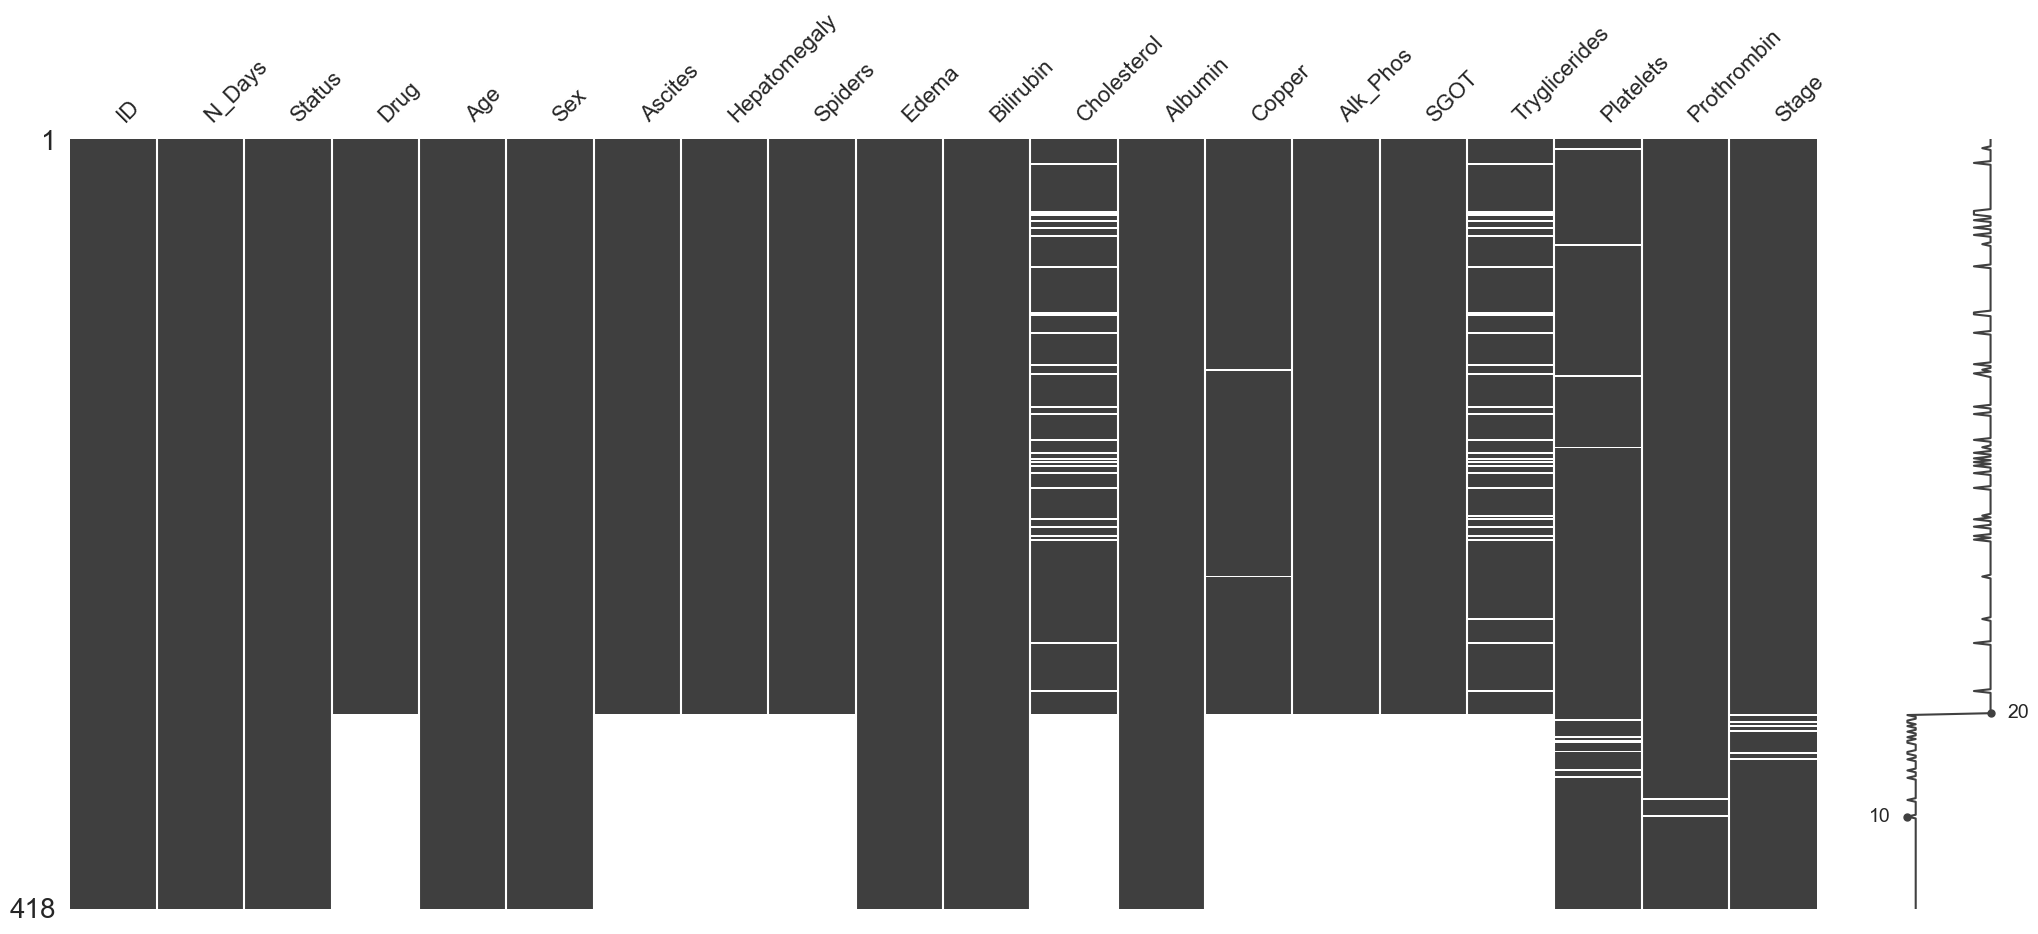

In [276]:
# Visualize the location of the missing data
mno.matrix(df_t2)

To address missing values in this dataset, two strategies are employed:
<br>
(1)For the 106 rows with missing values across 9 columns, given that there are only 17 clinical features representing the survival state of patients with liver cirrhosis, more than half of the feature lost. These rows will be deleted entirely to maintain data integrity.
<br>
(2)As for other columns such as 'Cholesterol', 'Copper', 'Tryglicerides', and 'Platelets', which also contain missing values, they are non-time series data. In such cases, the missing values will be imputed using the mean of each respective column.

In [277]:
# (1)Delete complete rows which contain the missing values in 9 columns
df_t2.dropna(subset=['Drug'],how='any',inplace=True)
df_t2.isnull().sum()

ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [278]:
#(2) Impute the missing value with mean of each column in which the missing values are located.
df_t2['Cholesterol'].fillna(df_t2['Cholesterol'].mean(), inplace=True)
df_t2['Copper'].fillna(df_t2['Copper'].mean(), inplace=True)
df_t2['Tryglicerides'].fillna(df_t2['Tryglicerides'].mean(), inplace=True)
df_t2['Platelets'].fillna(df_t2['Platelets'].mean(), inplace=True)

In [279]:
# Check the dataset after missing values imputation
display(df_t2.isnull().sum())

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

#### 1.2 Address duplicate records

In [280]:
# I define that all values in all columns are the same as the duplicated records
all_duplicates_t2 = df_t2.duplicated(keep=False)

# Display rows that are duplicates
all_duplicates_df_t2 = df_t2[all_duplicates_t2]
print("Duplicate rows where all values in all columns are the same")
display(all_duplicates_df_t2)

Duplicate rows where all values in all columns are the same


Empty DataFrame
Columns: [ID, N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []

There are no duplicate rows which all values in all columns are the same.

#### 1.3 Correct any inaccuracies or inconsistencies in the data

(1) Object data

In [281]:
#First check the unique values in the object-type columns to determine the appropriate actions

# Get the list of object-type columns
object_col_t2 = df_t2.select_dtypes(include=['object']).columns
#display(len(object_col_t2))

# Display unique values for each object-type column
for column in object_col_t2:
    print(f"Unique values in column '{column}':")
    display(df_t2[column].unique())

Unique values in column 'Status':


array(['D', 'C', 'CL'], dtype=object)

Unique values in column 'Drug':


array(['D-penicillamine', 'Placebo'], dtype=object)

Unique values in column 'Sex':


array(['F', 'M'], dtype=object)

Unique values in column 'Ascites':


array(['Y', 'N'], dtype=object)

Unique values in column 'Hepatomegaly':


array(['Y', 'N'], dtype=object)

Unique values in column 'Spiders':


array(['Y', 'N'], dtype=object)

Unique values in column 'Edema':


array(['Y', 'N', 'S'], dtype=object)

The object data looks consistent with the description of the dataset features.We will not do anything about the object data.

(2) Numerical data
<br>
Use the pair plot and boxplot to visualize the distribution of numerical data.

/Users/xiexiaoyang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


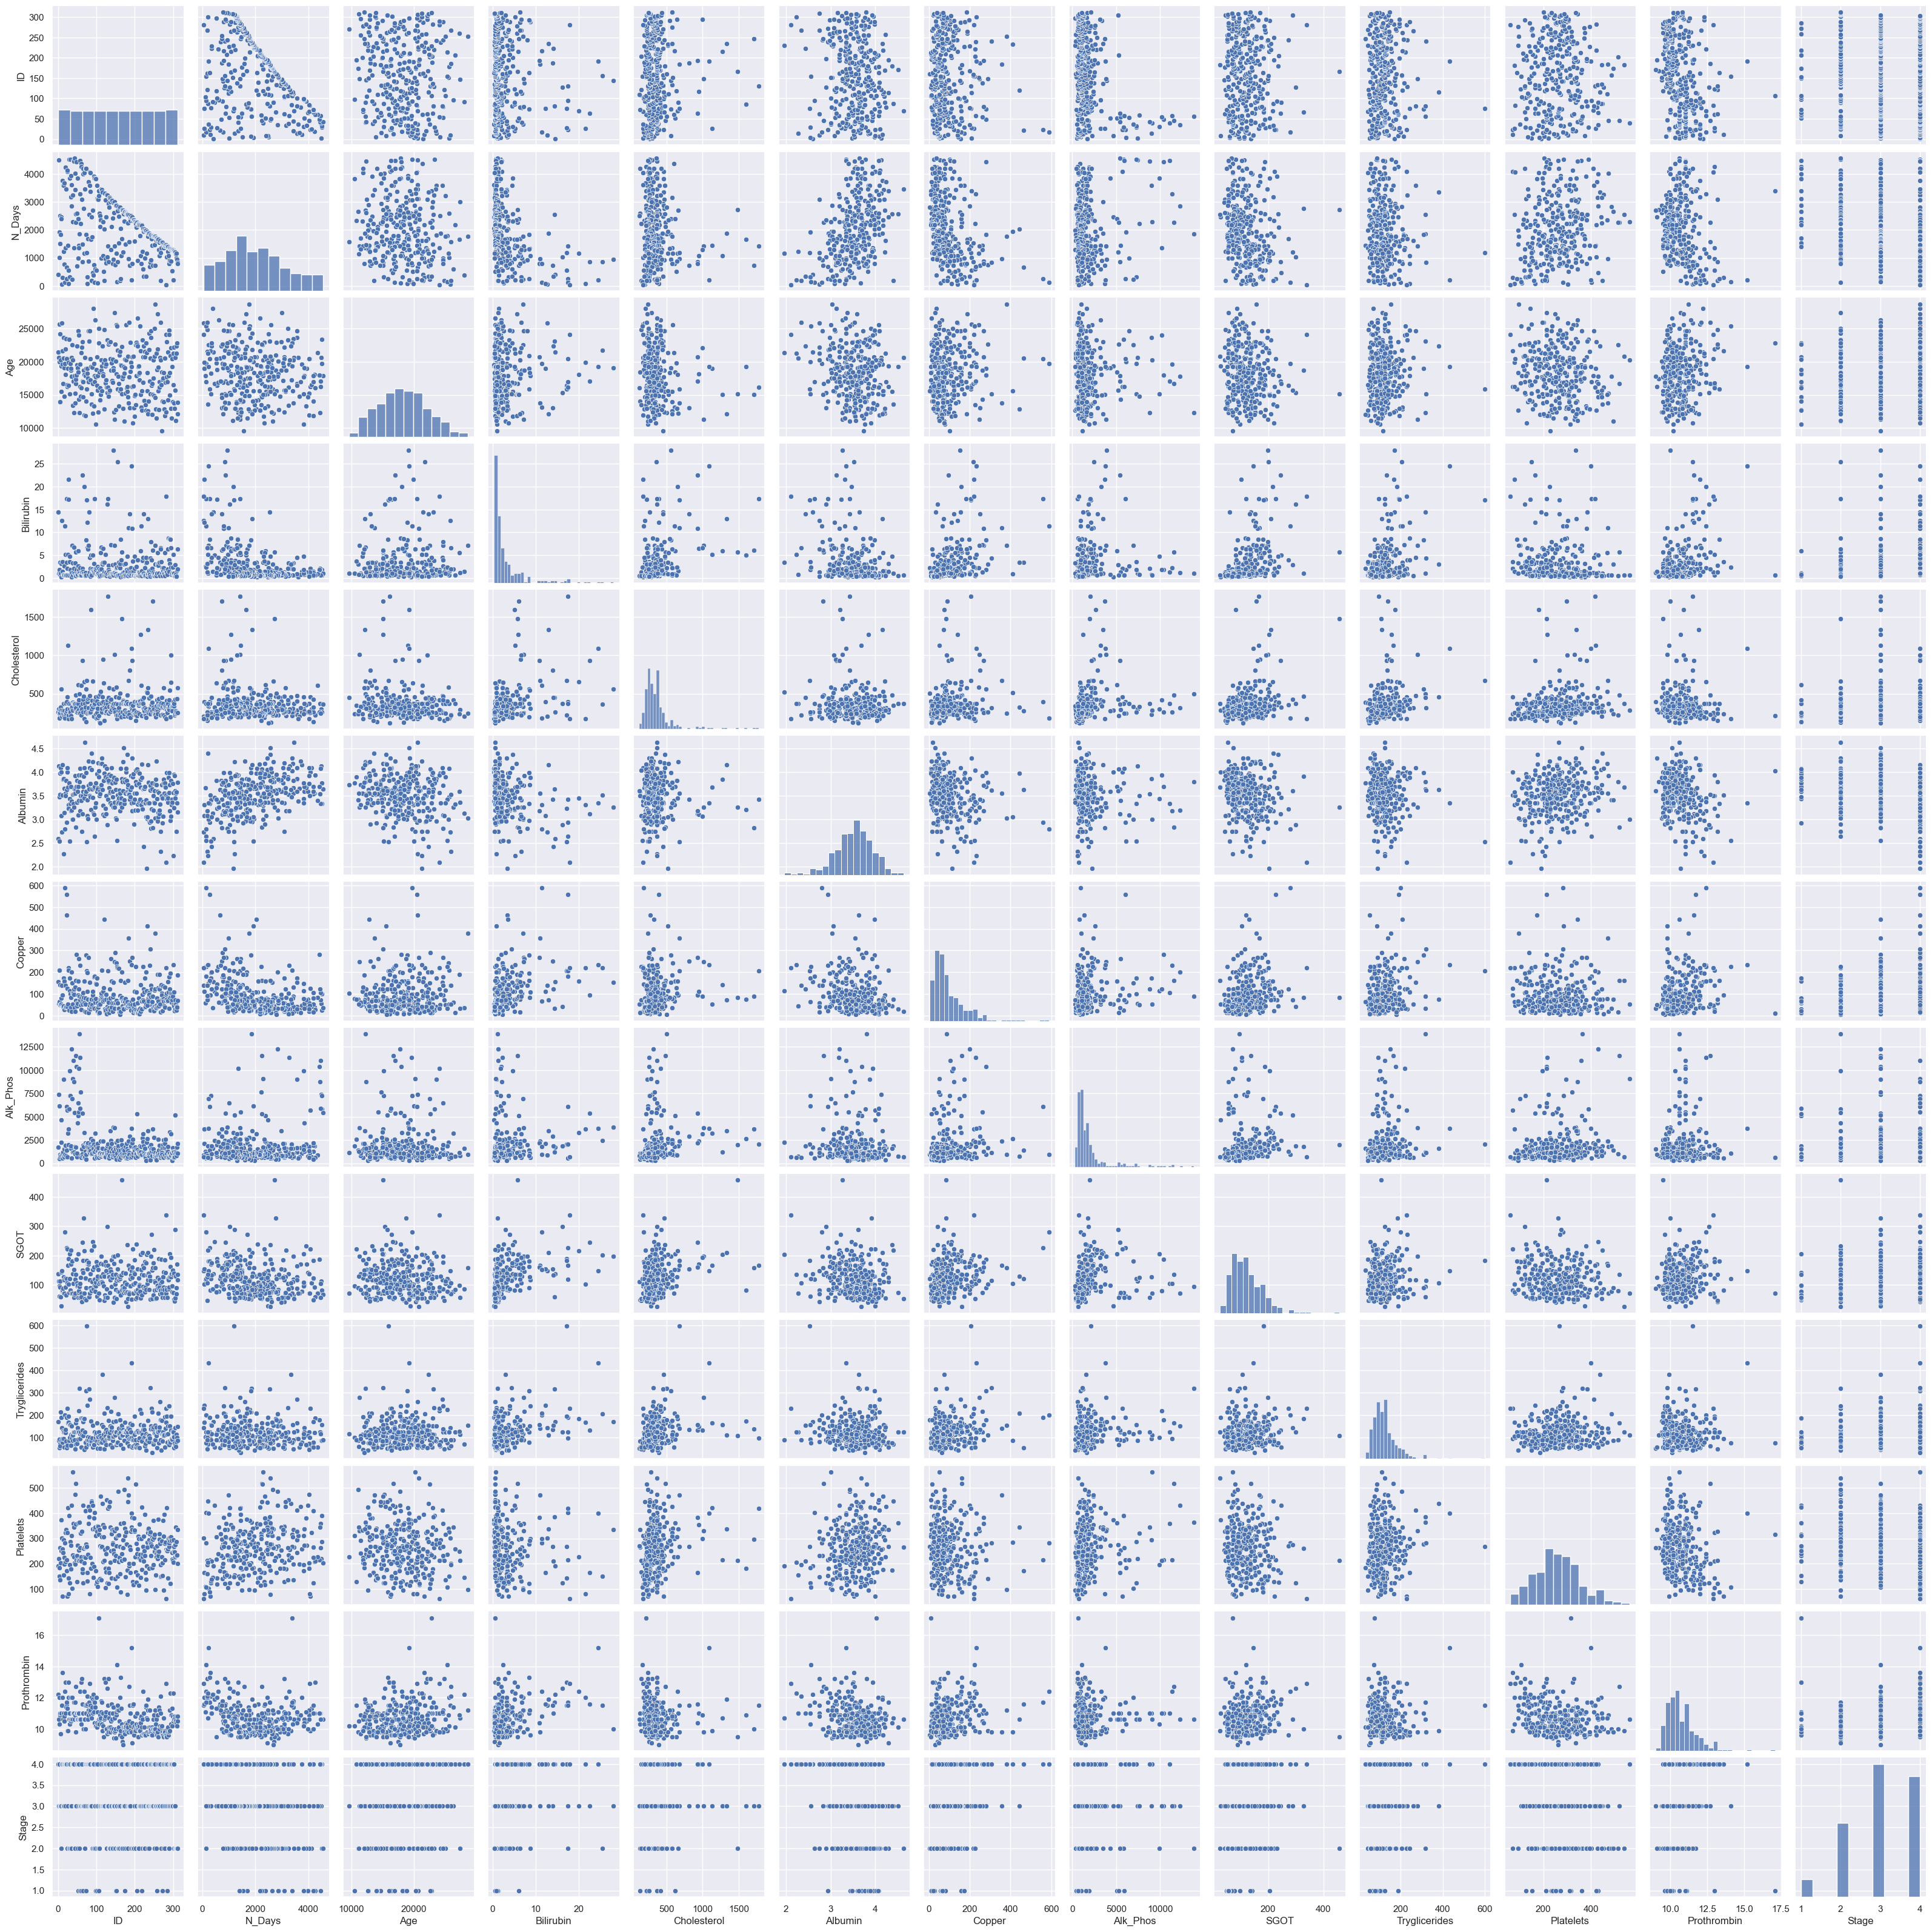

In [282]:
# Use the pair plot to see the distribution and relationship of the numeric data.
# Select numeric columns
numeric_columns_t2 = df_t2.select_dtypes(include=['int64', 'float64']).columns

# Plot the data point by using the pair plot
pairplot = sns.pairplot(df_t2[numeric_columns_t2])
plt.show() 

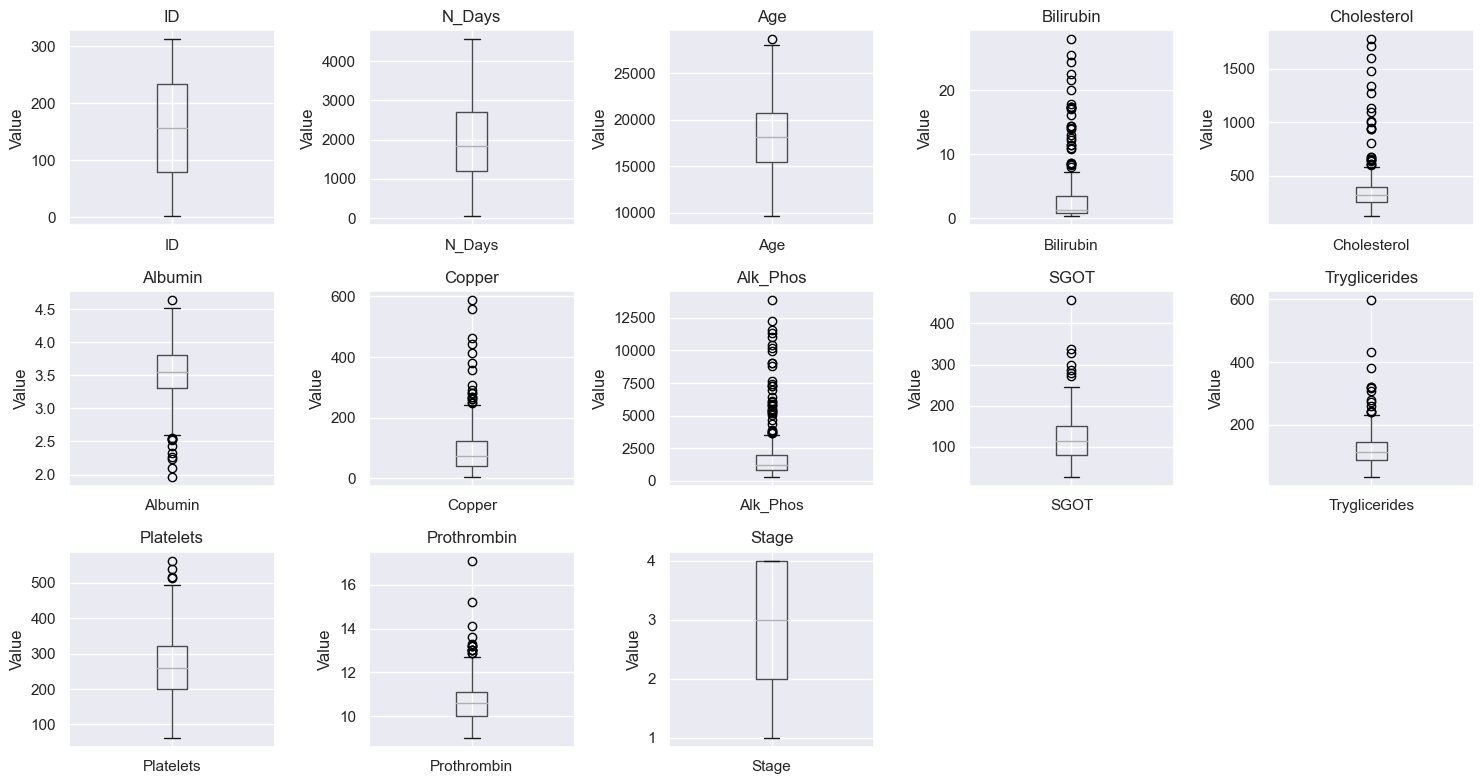

In [283]:
# Use the box plot to visualize the ditribution and outliers of the data.

# Create a figure and axes for the subplots
fig, axes = plt.subplots(3, 5, figsize=(15, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot box plots for each column in a subplot
for i, column_name in enumerate(numeric_columns_t2):
    if i < len(numeric_columns_t2):  
        df_t2.boxplot(column=column_name, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_ylabel('Value')

# Hide empty subplots
for ax in axes[len(numeric_columns_t2):]:
    ax.axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

From the pair plot, it's evident that most of the data points follow a normal distribution. However, the box plots reveal numerous outliers in columns such as 'Age' (in days), 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Triglycerides', 'Platelets', and 'Prothrombin'. 

#### While outliers are observed in these biochemical features, their presence is common in clinical datasets due to the inherent variability among patient samples.  Keep these values would be good for the futher analysis.

#### 1.4 Encoding categorical data
<br>
I plan to perform label encoding on the 'Status' and 'Edema' columns to represent the severity of their respective conditions. Encode the 'Sex' column to numerical values for further analysis. Other categorical data will be retained in their object type to preserve their clinical significance. 

In [284]:
# Encode the category as numberical values and store in new columns
# Map the levels and encoded as numberical values
status_map = { 'C': 0,'CL': 1,'D': 2}
edema_map = {'N':0, 'S':1, 'Y': 2}

df_t2['Status Encoded'] = df_t2['Status'].map(status_map)
df_t2['Edema Encoded'] = df_t2['Edema'].map(edema_map)

In [285]:
# Encode the gender column to numerical values
df_t2['Sex Encoded'] = label_encode.fit_transform(df_t2['Sex'])

In [286]:
# Check the dataset after encoding
display(df_t2.head())

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  ...  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  Prothrombin  \
0     Y  ...   156.0    1718.0  137.95          172.0      190.0         12.2   
1     N  ...    54.0    7394.8  113.52           88.0      221.0         10.6   
2     S  ...   210.0     516.0   96.10           55.0      151.0         12.0   
3     S  ...    64.0    6121.8   60.63           92.0      183.0         10.3   
4     N  ...   143.0     671.0  113.15           72.0      136.0         10.9   

   Stage  Status Encoded  Edema Encoded  Sex Encoded  
0    4.0               2              2            0  
1    3.0               0              0            0  
2    4.0               2              1            1  
3    4.0               2              1            0  
4    3.0               1              0            0  

[5 rows x 23 columns]

#### 1.5 Feature engineering
<br>
To facilitate exploration, I will convert the 'Age' column from days to years.

In [287]:
# Convert the days to years, I divided the age in days by the number of days in a year (approximately 365.25) 
# keep the result as integers
df_t2['Age_in_years'] = (df_t2['Age'] / 365.25).astype(int)

In [289]:
# Check the dataset after encoding
display(df_t2.head())

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  ...  Alk_Phos    SGOT  Tryglicerides  Platelets  Prothrombin  Stage  \
0     Y  ...    1718.0  137.95          172.0      190.0         12.2    4.0   
1     N  ...    7394.8  113.52           88.0      221.0         10.6    3.0   
2     S  ...     516.0   96.10           55.0      151.0         12.0    4.0   
3     S  ...    6121.8   60.63           92.0      183.0         10.3    4.0   
4     N  ...     671.0  113.15           72.0      136.0         10.9    3.0   

   Status Encoded  Edema Encoded  Sex Encoded  Age_in_years  
0               2              2            0            58  
1               0              0            0            56  
2               2              1            1            70  
3               2              1            0            54  
4               1              0            0            38  

[5 rows x 24 columns]

#### 1.6 Date and time feature extraction
<br>
This dataset does not include DateTime variables.

### 2. Line chart showing the Bilirubin levels (y-axis) and patient IDs (x-axis).

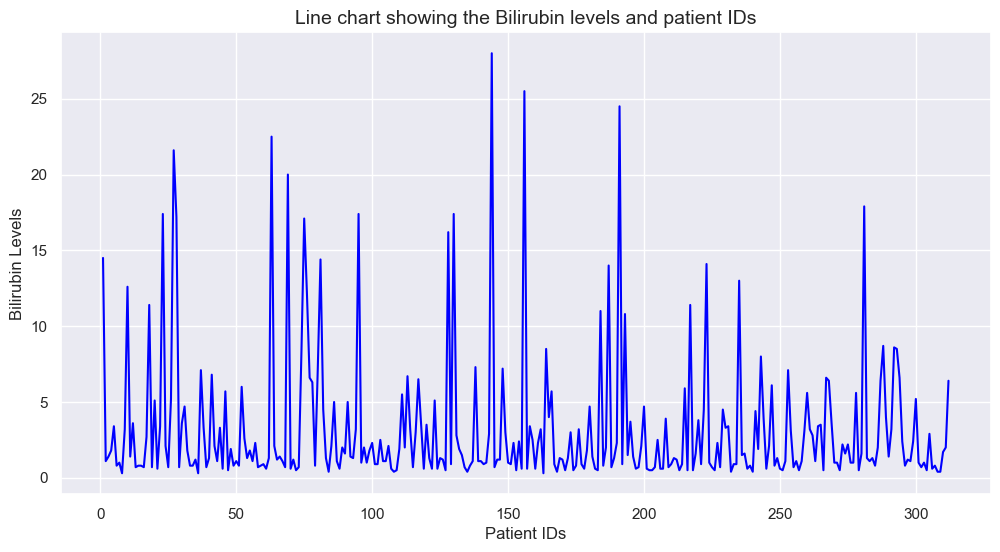

In [290]:
# Generate the line chart
# Define the figure size
plt.figure(figsize=(12,6))

# plot the data and add the tile, labels
plt.plot((df_t2['ID']),df_t2['Bilirubin'],linestyle = 'solid', color = 'blue')
plt.title('Line chart showing the Bilirubin levels and patient IDs', size = 14)
plt.xlabel('Patient IDs')
plt.ylabel('Bilirubin Levels')
plt.grid(True)
plt.show()

Based on this line plot, there appears to be no noticeable trend in Bilirubin levels when plotted against patient IDs. The line fluctuates without any discernible pattern or trend. It is possible that the level of Bilirubin is related to the disease status or treatment strategies rather than being influenced by patient IDs.

### 3. Explore the impact of age and gender on the severity of liver disease among patients.

I will employ the following visualizations to explore the relationship between age, gender, and disease severity: 
<br>
(1) a box plot to illustrate the distribution of age across different disease stages; 
<br>
(2) a stacked bar chart to display the distribution of gender across different disease stages; 
<br>
(3) a swarm plot to visualize the joint distribution of age and gender across different disease stages; 
<br>
(4) a correlation matrix to depict the correlation between these demographic characteristics and disease severity.

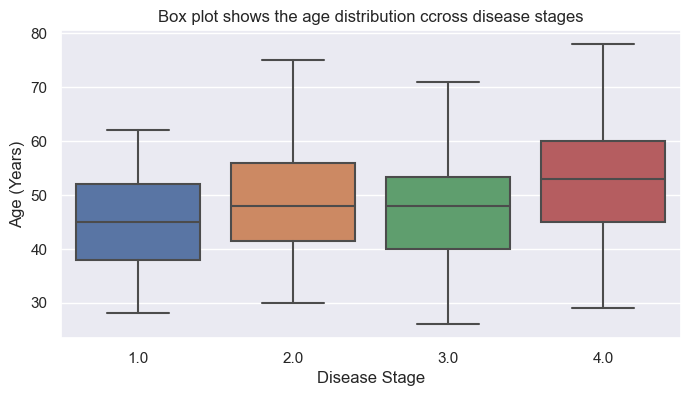

In [291]:
# (1)Box plot shows the distribution of age across different disease stages
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_t2, x='Stage', y='Age_in_years')
plt.title('Box plot shows the age distribution ccross disease stages')
plt.xlabel('Disease Stage')
plt.ylabel('Age (Years)')
plt.show()

<Figure size 800x600 with 0 Axes>

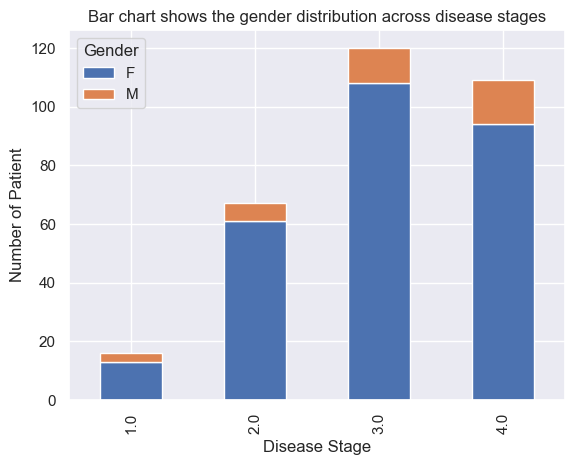

In [292]:
# (2) Stacked bar chart to display the distribution of gender across different disease stages

# Calculate gender distribution across different disease stages
sex_by_stage = df_t2.groupby(['Stage', 'Sex']).size().unstack()

# Generate bar chart to visualize gender distribution across different disease stages
plt.figure(figsize=(8, 6))
sex_by_stage.plot(kind='bar', stacked=True)
plt.title('Bar chart shows the gender distribution across disease stages')
plt.xlabel('Disease Stage')
plt.ylabel('Number of Patient')
plt.legend(title='Gender')
plt.show()

Text(0.5, 1.0, 'Swarm plot show the distribution of age and gender across different disease stages')

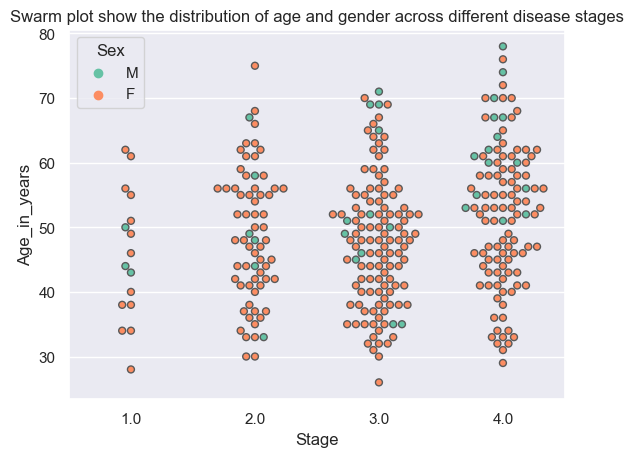

In [293]:
# (3) Swarm plot shows the distribution of age and gender across different disease stages
sns.swarmplot(x='Stage', y='Age_in_years', data=df_t2, hue = 'Sex', palette="Set2",linewidth=1)
plt.title('Swarm plot show the distribution of age and gender across different disease stages')

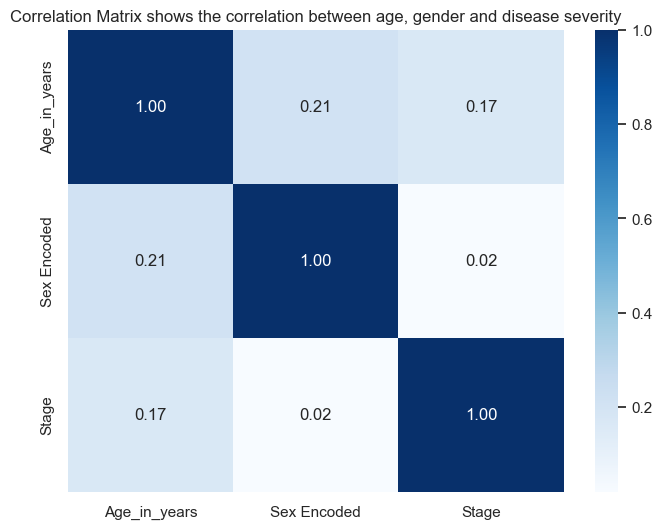

In [294]:
# (4) Correlation matrix shows the correlation between age, gender and disease severity.
# Calculate correlation between age, gender, and disease severity
cm_t2 = df_t2[['Age_in_years', 'Sex Encoded', 'Stage']].corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_t2, annot=True,  cmap='Blues',fmt=".2f")
plt.title('Correlation Matrix shows the correlation between age, gender and disease severity')
plt.show()

#### (1) Age Distribution Across Different Disease Stages: 
<br>In the box plot, the median age across the four disease stages is similar and the distribution of different ages is not skew, with stage four showing the highest median age and stage one the lowest. However, the difference in median age is not substantial, ranging from approximately 45 to 50 years. Stage one exhibits the smallest range of age years among all four disease stages.
#### (2) Gender Distribution: 
<br>The bar chart illustrates that females constitute the majority of patients across all four disease stages. Stage three has the largest number of patients, while stage one has the fewest. This might be attributed to patients seeking medical attention only when symptoms become evident, indicating that the disease is in advanced stages. The proportion of males in stages three and four is higher compared to stages one and two.
#### (3) Distribution of Age and Gender Across Disease Stages: 
<br>The swarm plot visually represents the distribution of age and gender. Stage three has the highest number of patients, and stage four has a greater proportion of older patients. Additionally, females outnumber males across all four disease stages. And male are more in older patient than yougers.
#### (4) Correlation Analysis: 
<br>The correlation coefficients between age and disease stages and between sex and disease stages are 0.17 and 0.02, respectively. These values suggest that there is no significant correlation between these demographic characteristics and disease severity. 
<br>This conclusion aligns with the observations from the visualizations, indicating similar age ranges across all disease stages and the presence of both female and male patients across the stages. While stage four appears to have more older patients based on the box plot, the difference is not significant enough to establish a strong correlation.

### 4. Heatmap to generate correlation between numeric features

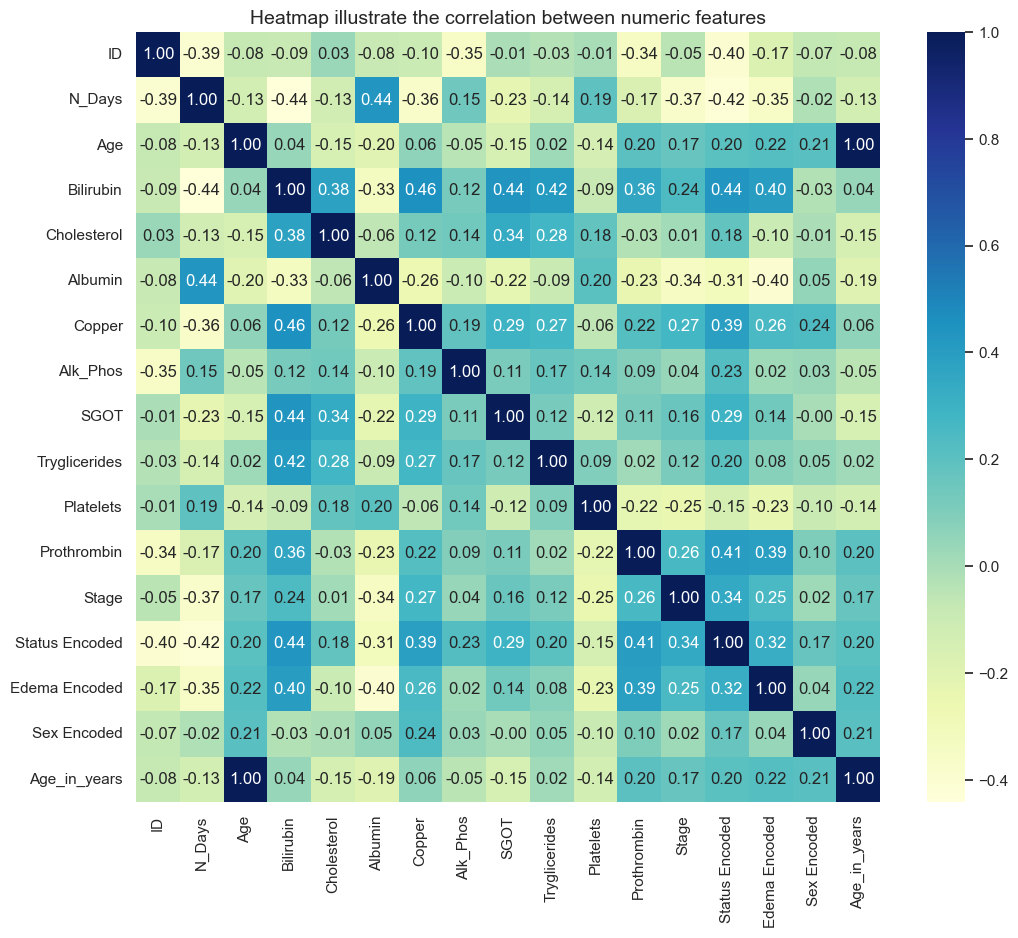

In [295]:
# Selecting only the numerical columns
numeric_column_t2 = df_t2.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix_t2 = numeric_column_t2.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_t2, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap illustrate the correlation between numeric features', size =14)
plt.show()

The absolute value of the correlation coefficient represents the significance of correlation, where 1 indicates total correlation. In the heatmap of the correlation matrix, we did not find highly significant correlations between these numerical features, but some minor correlations and indications can be explored:

(1) The 'Age' and 'Age_in_years' columns have a correlation coefficient of 1 since 'Age_in_years' is derived from 'Age'.

(2) 'N_Days', representing the number of days between registration and the earlier of death, transplantation, or study analysis, has a minor positive correlation with the level of Albumin and is negatively correlated with the level of Bilirubin, disease stages, and status. This suggests that after registration and before any treatment or death, the level of Albumin increases while the level of Bilirubin indicates severe disease development.

(3) Positive correlations between the levels of Bilirubin, Cholesterol, Copper, SGOT, Triglycerides, Prothrombin, and disease severity can be found, but they are not significant. This indicates that as the disease develops, the levels of these clinical features increase.

(4) The level of Albumin is negatively associated with the Edema stages (-0.4), while the level of Prothrombin is positively associated with the edema stages (0.39). This indicates that the levels of Albumin and Prothrombin can be used to predict the efficiency of edema treatment."

### 5. Boxplot to visualize the distribution of SGOT levels among patients with histologic stage of disease.

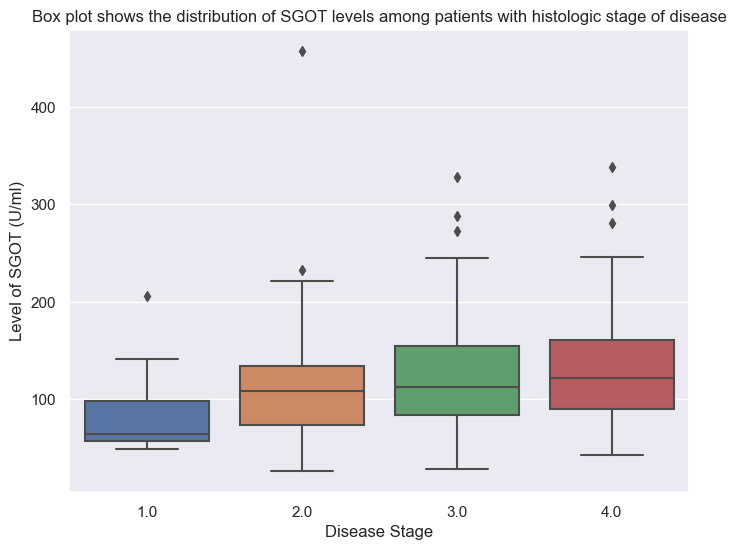

In [296]:
# Box plot visualize SGOT levels distribution across different disease stages
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_t2, x='Stage', y='SGOT')
plt.title('Box plot shows the distribution of SGOT levels among patients with histologic stage of disease')
plt.xlabel('Disease Stage')
plt.ylabel('Level of SGOT (U/ml)')
plt.show()

From the boxplot illustrating the distribution of SGOT levels among patients with histologic stages of disease, it's evident that the median SGOT levels increase with advancing disease stages. Moreover, the variability in SGOT levels appears to be more pronounced in stages 3 and 4 given the interquartile range is bigger. Although some outliers are present, they represent genuine data points from the patient sample and do not significantly alter the overall trend.

Specifically, in stage 1, the median SGOT level is close to the lower range, suggesting a higher proportion of patients with relatively lower SGOT levels compared to higher levels. Conversely, in stage 4, the distribution of SGOT levels is less skewed, indicating a more balanced representation across the range of SGOT values.

### 6. The relationship between different laboratory parameters
<br>
(1) Box plots will used to visualize the relationship between the laboratory parameters and the severity of disease stages.
<br>
(2) Correlation matrix will be used to explore the correlations between the laboratory parameters and the severity of liver cirrhosis stages.

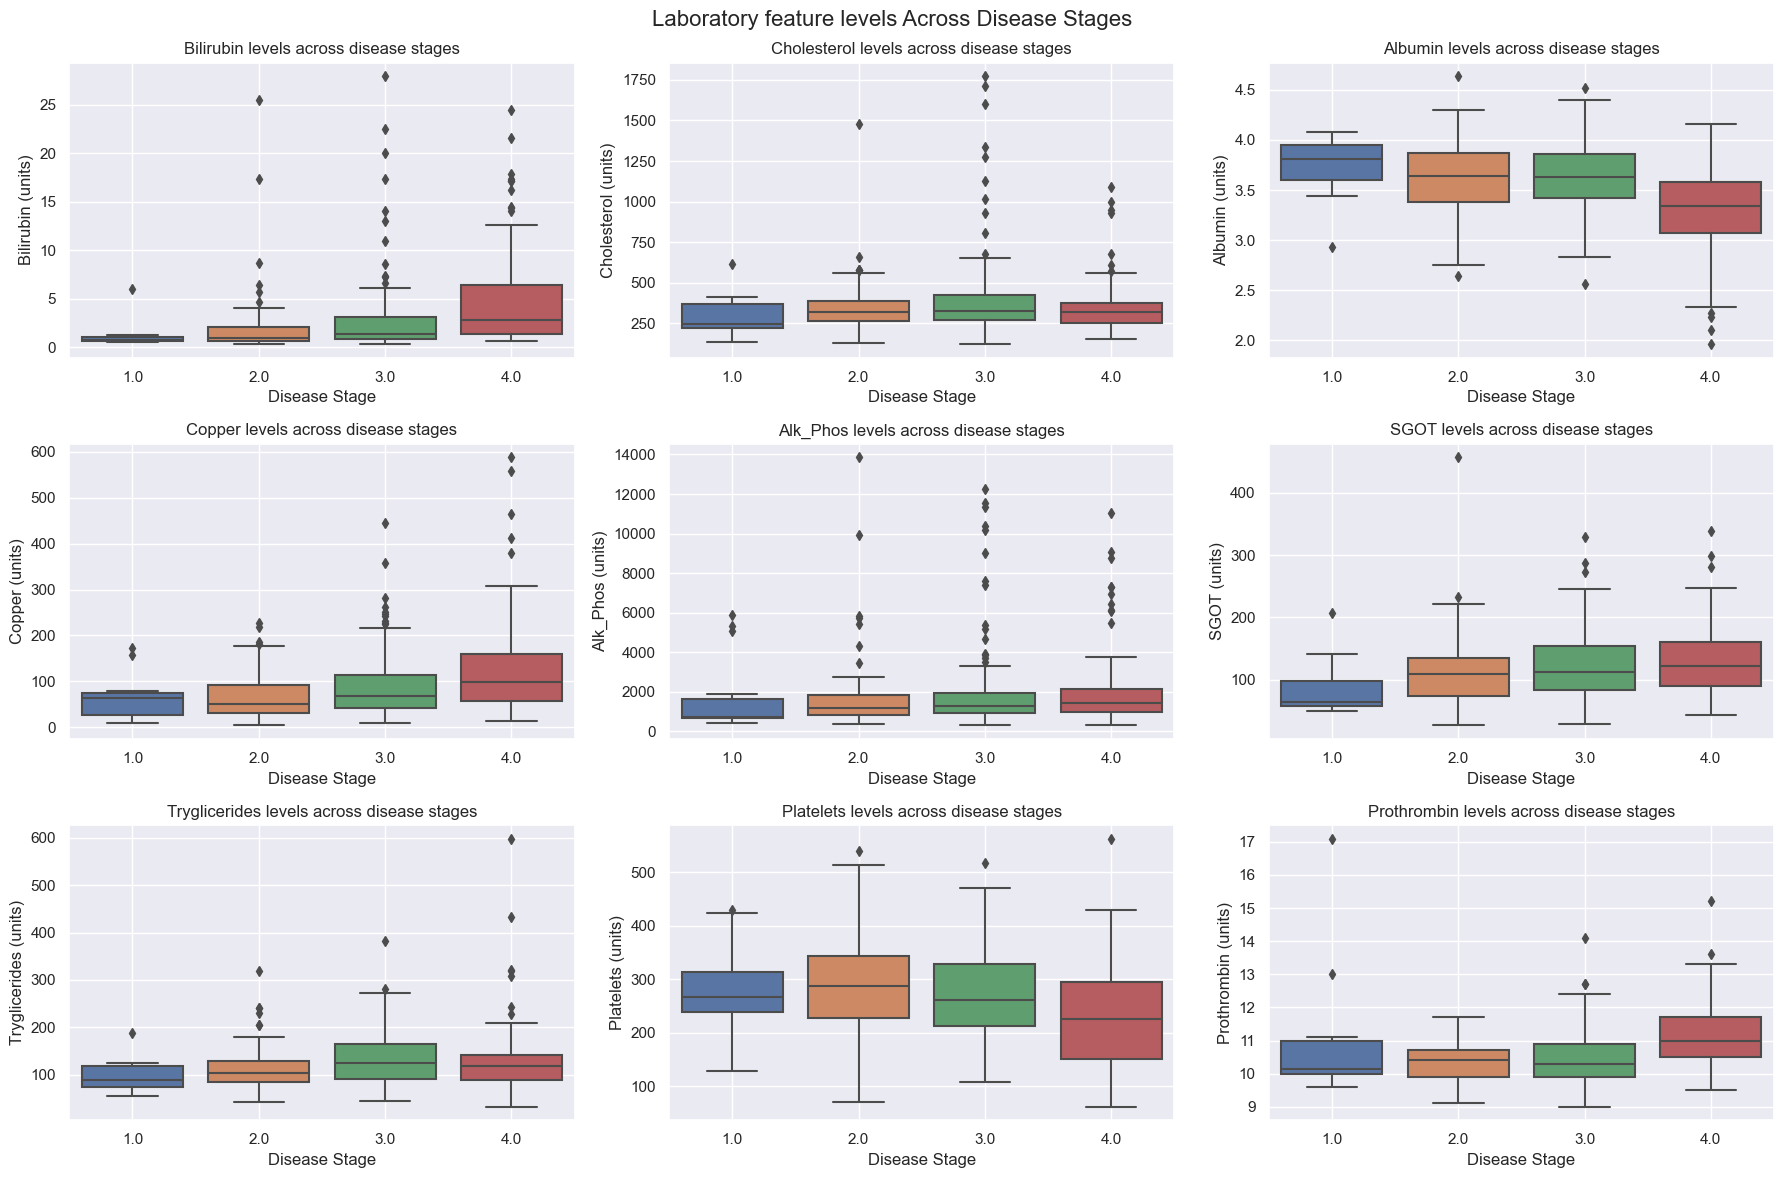

In [297]:
# (1) Box plot for visualization
# Laboratory columns 
col_lab = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Laboratory feature levels Across Disease Stages', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column and plot a boxplot
for i, column in enumerate(col_lab):
    sns.boxplot(data=df_t2, x='Stage', y=column, ax=axes[i])
    axes[i].set_title(f'{column} levels across disease stages')
    axes[i].set_xlabel('Disease Stage')
    axes[i].set_ylabel(f'{column} (units)')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

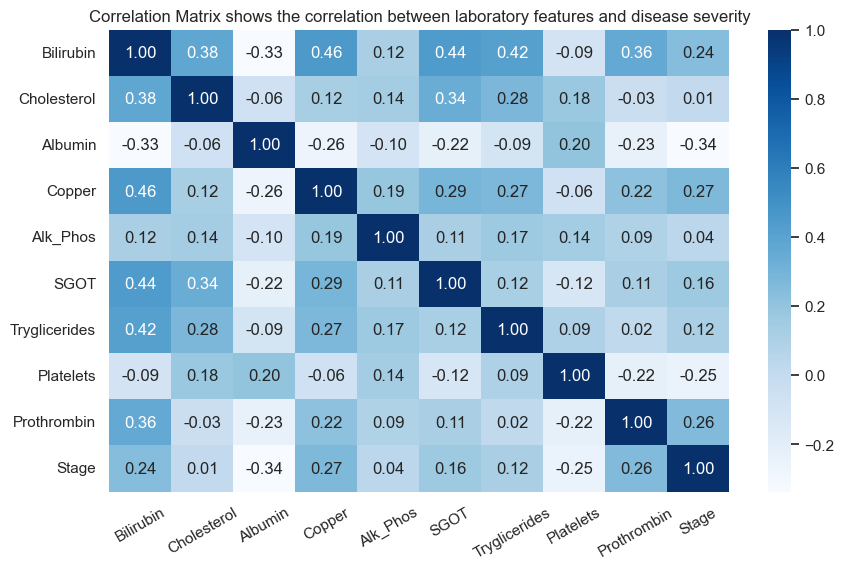

In [298]:
#(2) Correlation matrix shows the correlation between laboratory features and disease severity
cm_t2_lab = df_t2[['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin','Stage']].corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_t2_lab, annot=True,  cmap='Blues',fmt=".2f")
plt.title('Correlation Matrix shows the correlation between laboratory features and disease severity')
plt.xticks(rotation = 30)
plt.show()

From the box plots and correlation analysis, we can discern the distribution and relationship between each laboratory feature and the severity of the disease:
#### (1) Bilirubin and Disease Severity: 
The median level of bilirubin increases with advancing disease stages, with stage 4 exhibiting the highest levels. However, there are considerable variations, particularly in stages 2, 3, and 4, with several "outliers" observed.
#### (2) Cholesterol Levels: 
Cholesterol levels appear relatively stable across different disease stages, with a slight increase noted in stages 2 and 3. Stage 3 consistently exhibits higher cholesterol levels compared to other stages.
#### (3) Albumin Levels:
A negative correlation is evident between albumin levels and disease stage, indicating a decreasing trend as the disease progresses. Stage 2 and 3 show similar albumin levels, both in terms of median values and distribution.
#### (4) Copper Levels: 
Similar to bilirubin, copper levels exhibit a positive relationship with disease severity, with higher levels observed in advanced stages. Stage 4, in particular, shows elevated copper levels and a higher proportion of high copper levels.
#### (5) Alkaline Phosphatase (Alk_Phos) Levels: 
Alk_Phos levels remain relatively stable across different disease severities. However, a slight decrease is observed in stage 1, and larger variations are noted in stages 2, 3, and 4.
#### (6) SGOT Levels: 
SGOT levels show a positive correlation with disease stages, indicating an increase as the disease advances. However, the change in SGOT levels is less pronounced in later stages (3 and 4).
#### (7) Triglycerides Levels: 
Similar to SGOT, triglycerides levels display a positive relationship with disease severity, with larger variations, especially high levels, observed in later stages.
#### (8) Platelets Levels: 
Median platelet levels exhibit a slight decrease with disease progression, although the overall range remains consistent across different stages.
#### (9) Prothrombin Levels: 
Prothrombin levels are lower in stages 1 to 3, with stage 4 displaying the highest levels. However, a few high-value outliers are observed in stage 1, suggesting inherent variability in prothrombin levels among patients.
#### (10) Correlation Analysis: 
The correlation coefficients between laboratory features and disease severity are generally weak (absolute values < 0.5). Notable correlations include minor positive correlations between bilirubin, copper, SGOT, triglycerides, and prothrombin levels with disease severity, while albumin and platelets levels exhibit minor negative correlations. However, there are no significant correlations between cholesterol, alkaline phosphatase, and disease severity. This weak correlation might be attributed to data variability and the limited sample size.

### 7. Relationship between liver disease severity and treatment effectiveness
<br> Based on findings from studies such as the paper cited (doi: 10.1002/14651858.CD004789.pub2), D-penicillamine has been shown to decrease hepatic levels of copper and is associated with liver injury. To assess the effectiveness of D-penicillamine in reducing copper levels, I will utilize the 'Copper' column. Additionally, I will consider 'Alk_Phos' (alkaline phosphatase) and 'SGOT' (serum glutamic-oxaloacetic transaminase) as common indicators of liver injury.

Using the columns 'Copper', 'Alk_Phos', 'SGOT', 'Drug', and 'Stage', I aim to explore the relationship between liver disease severity and treatment effectiveness. Specifically, I will compare the treatment efficiency of the drug in reducing copper levels and assess liver injury severity across different drug treatments and disease stages.

I will employ boxplots to compare the treatment efficiency of the drug in reducing copper levels, and utilize violin plots to compare liver injury severity across different drug treatments and disease severity levels.

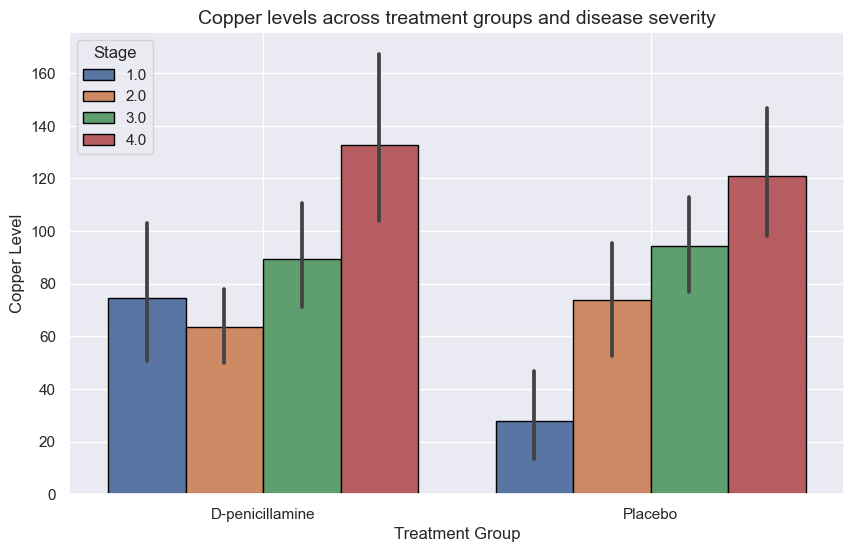

In [299]:
# Filter the relevant columns
df_treat = df_t2[['Copper', 'Alk_Phos', 'SGOT', 'Drug', 'Stage']]

# Boxplots to to compare the treatment efficiency of the drug in reducing copper levels. 
# 'Drug' as the x-axis
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered, x='Drug', y='Copper', hue="Stage",edgecolor = 'black')
plt.title('Copper levels across treatment groups and disease severity', size =14)
plt.xlabel('Treatment Group')
plt.ylabel('Copper Level')
plt.grid(True)
plt.show()

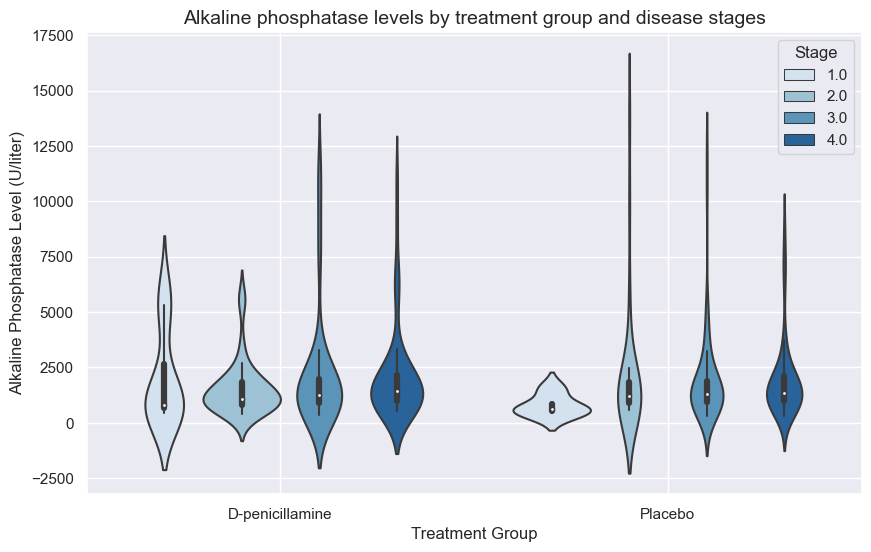

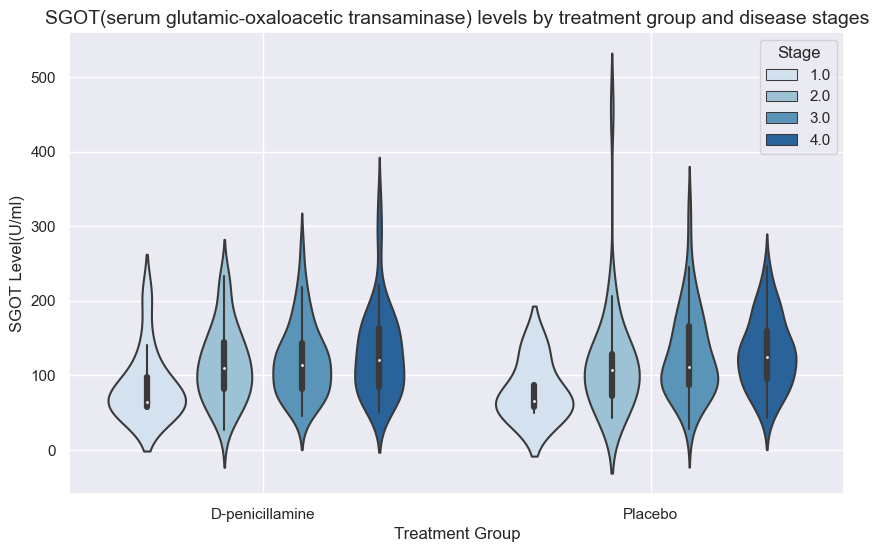

In [300]:
# Violin Plots to compare liver injury severity across different drug treatments and disease severity levels.
# Alk_Phos level across drug group and disease severity
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtered, x='Drug', y='Alk_Phos', hue = 'Stage', palette = "Blues")
plt.title('Alkaline phosphatase levels by treatment group and disease stages', size= 14)
plt.xlabel('Treatment Group')
plt.ylabel('Alkaline Phosphatase Level (U/liter)')
plt.grid(True)
plt.show()

# SGOT level across drug group and disease severity
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtered, x='Drug', y='SGOT', hue = 'Stage',palette = "Blues")
plt.title('SGOT(serum glutamic-oxaloacetic transaminase) levels by treatment group and disease stages', size =14)
plt.xlabel('Treatment Group')
plt.ylabel('SGOT Level(U/ml)')
plt.grid(True)
plt.show()

Based on the drug's expected function, D-penicillamine is anticipated to reduce copper levels and alleviate liver injury, as indicated by decreased levels of Alk_Phos and SGOT in the serum, thereby potentially mitigating disease severity.

Examining the barplot depicting copper levels across different drug treatments and disease severities, the drug did not significantly reduce copper levels. There appears to be a slight decrease in copper levels in stages 2 and 3 with drug treatment, while levels even slightly increased in stages 1 and 4 compared to placebo. This suggests that the drug may have some efficacy in reducing copper levels in stages 2 and 3, but not in stages 1 and 4.

Analysis of the Violin plot displaying Alk_Phos and SGOT levels reveals a minor increasing trend as the disease progresses, irrespective of treatment with D-penicillamine or placebo. However, there is no notable reduction in Alk_Phos and SGOT levels among drug-treated patients compared to those receiving placebo across all four disease stages. Nonetheless, drug-treated patients exhibit a narrower range of Alk_Phos and SGOT levels, indicating less variability in these markers.

In summary, treatment with D-penicillamine does not demonstrate significant effectiveness across all four disease stages. The outcomes, including copper levels, Alk_Phos, and SGOT, do not exhibit significant reductions following drug treatment when compared to placebo.